In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
import matplotlib as mpl
import re
mpl.rcParams['figure.dpi'] = 300


df = pd.read_excel('fixed_heatmap_COG.xlsx')
heatmap_df =df
df

Unnamed: 0                                        description  \
0    A0A0P0F7V4      Endolytic peptidoglycan transglycosylase RIpA   
1    A0A0P0EHW0                      Lytic murein transglycosylase   
2    A0A0N7I8Z4                                    Beta-lactarnase   
3    A0A0P0EIH1              Cell envelope biogenesis protein OmpA   
4    A0A0P0ERG4                         Cell division protein FtsW   
5    A0A0P0E9P8                                       DNA helicase   
6    A0A0P0ELL3                 Restriction endonuclease subunit M   
7    A0A0P0ED99                                       RNA helicase   
8    A0A0P0EDN0               Transcription elongation factor GreB   
9    A0A0P0EYQ1                                  Methyltransferase   
10   A0A0P0EFM3                            5'-Nucleotidase/apyrase   
11   A0A0P0EDQ8     Vitamin B12-dependent ribonucleotide reductase   
12   A0A0P0EHP2                  Phosphornethylpyrimidine synthase   
13   A0A0P0F7L6                    Cytosine deaminase (EC 3.5.4.1)   
14   A0A0P0FBE4          Type I restriction endonuclease subunit R   
15   A0A0P0EKD2                  AMP nucleosidase (EC 3.2.2.4) amn   
16   A0A0P0FAG2                         MBL fold metallo-hydrolase   
17   A0A0N7I8L2                   A/G-specific adenine glycosylase   
18   A0A0P0F523                  Nucleoside triphosphate hydrolase   
19   A0A0P0F692                                     Ribonuclease T   
20   A0A0N7I859                 RNA 2',3'-cyclic phosphodiesterase   
21   A0A0N7I9A9                                     Uridine kinase   
22   A0A0P0FAH1                           Restriction endonuclease   
23   A0A0N7I885                         Excinuclease ABC subunit A   
24   A0A0P0ET22                          Bifunctional protein GImU   
25   A0A0P0F289  Tetratricopeptide repeat-containing domain pro...   
26   A0A0P0EWU8                 Histone deacetylast family protein   
27   A0A0P0EFR8  Tetratricopeptide repeat-containing domain pro...   
28   A0A0P0EWQ6  Sell-like/tetratricopeptide-like helical domai...   
29   A0A060DE00                              Formate dehydrogenase   
..          ...                                                ...   
288  A0A0P0FC92                            Uncharacterized protein   
289  A0A0P0EMB6                            Uncharacterized protein   
290  A0A0P0ER43                            Uncharacterized protein   
291  A0A0P0F670                            Uncharacterized protein   
292  A0A0P0EZY3                            Uncharacterized protein   
293  A0A0N717F2              Dimethylmenaquinone methyltransferase   
294  A0A0P0F5B8    Amino acid adenylation domain containing ligase   
295  A0A0P0EW05                      2-dehydropantoate 2-reductase   
296  A0A0P0EUE7  Membrane bound methyl-accepting protein MCP (M...   
297  A0A0P0EUU4                        HAMP-containing MCP (Mcp18)   
298  A0A0P0EWY4                         HAMP containing MCP (Mcp9)   
299  A0A0P0ENJ2                         HAMP containing MCP (Tlp2)   
300  A0A0N7I7Z5                         Chemotaxis protein (Mcp20)   
301  A0A0P0F0C4                                Diguanylate cyclase   
302  A0A0P0F757                 GGDEF containing CheY-like protein   
303  A0A0P0ERP2                                   Histidine kinase   
304  A0A0N7I7I7                                   Histidine kinase   
305  A0A0N7I965                 Histidine kinase/HSP90-like ATPase   
306  A0A0P0EIL1                       Alpha-1,3-fucosyltransferase   
307  A0A0P0F7N5  4-deoxy-L-threo-5-hexosulose-uronate ketol-iso...   
308  A0A0P0F770                          Malonyl-CoA decarboxylase   
309  A0A060DNV2                               Acyl carrier protein   
310  A0A0N7I816                      Fatty acid desaturase, type 2   
311  A0A0P0EYX3                         Beta-ketoacyl-ACP synthase   
312  A0A0P0FCY8                  DUF1127 domain containing protein   
313  A0A0P0FDZ9

In [2]:
# Getting dictionary: ID to class
dictionary_class_IDtoclass = pd.read_table('cog-class_total.txt')

dict_IDtoclass = {}
for i, value in enumerate(dictionary_class_IDtoclass['#Class']):
    dict_IDtoclass[value]=dictionary_class_IDtoclass['Description'][i]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [3]:
mean_A1 = heatmap_df[heatmap_df.columns[2:5]].mean(axis=1)
mean_A4 = heatmap_df[heatmap_df.columns[5:8]].mean(axis=1)
mean_A1A4 =  heatmap_df[heatmap_df.columns[8:11]].mean(axis=1)

data_frame = pd.DataFrame(0, index=np.arange(len(df)), columns=['A1/sp7', 'A4/sp7', 'A1A4/sp7'])
data_frame['A1/sp7'] = mean_A1
data_frame['A4/sp7'] = mean_A4
data_frame['A1A4/sp7'] = mean_A1A4

index_name = []
for i, value in enumerate(df['description']):
    index_name.append(str(df['Unnamed: 0'][i]) + ' ' +str(value))

data_frame['name'] = index_name
data_frame = data_frame.set_index('name', drop=True).rename_axis(None)
heatmap_df = data_frame

data_frame

A1/sp7    A4/sp7  \
A0A0P0F7V4 Endolytic peptidoglycan transglycosy... -7.445941e-01 -1.331635   
A0A0P0EHW0 Lytic murein transglycosylase            1.603657e+00 -0.609967   
A0A0N7I8Z4 Beta-lactarnase                          1.243850e-01 -2.804530   
A0A0P0EIH1 Cell envelope biogenesis protein OmpA   -4.331384e-01 -1.322264   
A0A0P0ERG4 Cell division protein FtsW               0.000000e+00 -4.480847   
A0A0P0E9P8 DNA helicase                             0.000000e+00  4.863090   
A0A0P0ELL3 Restriction endonuclease subunit M      -2.265938e+00 -2.272126   
A0A0P0ED99 RNA helicase                             1.060312e+00  1.992162   
A0A0P0EDN0 Transcription elongation factor GreB    -1.906340e+00  1.042083   
A0A0P0EYQ1 Methyltransferase                       -1.456585e-01  1.128648   
A0A0P0EFM3 5'-Nucleotidase/apyrase                  3.903282e-02  1.025863   
A0A0P0EDQ8 Vitamin B12-dependent ribonucleotide...  2.485199e-01  1.173890   
A0A0P0EHP2 Phosphornethylpyrimidine synthase        5.843440e-01  1.020633   
A0A0P0F7L6 Cytosine deaminase (EC 3.5.4.1)          1.542605e+00 -0.856678   
A0A0P0FBE4 Type I restriction endonuclease subu...  2.340883e+00 -2.038788   
A0A0P0EKD2 AMP nucleosidase (EC 3.2.2.4) amn       -1.271366e+00 -2.852618   
A0A0P0FAG2 MBL fold metallo-hydrolase              -1.363651e+00 -2.744539   
A0A0N7I8L2 A/G-specific adenine glycosylase         6.466982e-01 -1.314631   
A0A0P0F523 Nucleoside triphosphate hydrolase       -8.402694e-02 -1.238885   
A0A0P0F692 Ribonuclease T                           0.000000e+00 -1.325303   
A0A0N7I859 RNA 2',3'-cyclic phosphodiesterase       3.023359e-12 -1.159946   
A0A0N7I9A9 Uridine kinase                           2.190308e-01 -1.897156   
A0A0P0FAH1 Restriction endonuclease                -1.540813e-01 -2.183555   
A0A0N7I885 Excinuclease ABC subunit A               6.808279e-01 -2.331610   
A0A0P0ET22 Bifunctional protein GImU                1.355664e+00  1.093570   
A0A0P0F289 Tetratricopeptide repeat-containing ... -2.123887e-01 -1.205477   
A0A0P0EWU8 Histone deacetylast family protein       7.779299e-01 -1.300090   
A0A0P0EFR8 Tetratricopeptide repeat-containing ... -9.335882e-01 -0.478219   
A0A0P0EWQ6 Sell-like/tetratricopeptide-like hel...  9.345329e-01 -2.085682   
A0A060DE00 Formate dehydrogenase                    4.425723e-01  3.043761   
...                                                          ...       ...   
A0A0P0FC92 Uncharacterized protein                  2.505245e+00 -2.124511   
A0A0P0EMB6 Uncharacterized protein                  1.311469e+00 -2.142271   
A0A0P0ER43 Uncharacterized protein                 -6.544995e-01 -4.641972   
A0A0P0F670 Uncharacterized protein                 -1.336722e+00 -5.050603   
A0A0P0EZY3 Uncharacterized protein                 -2.941803e+00 -3.399336   
A0A0N717F2 Dimethylmenaquinone methyltransferase    4.192898e-01  1.496469   
A0A0P0F5B8 Amino acid adenylation domain contai...  2.760634e-01 -2.146868   
A0A0P0EW05 2-dehydropantoate 2-reductase            1.788809e-01 -2.640921   
A0A0P0EUE7 Membrane bound methyl-accepting prot...  5.050978e-01  2.296339   
A0A0P0EUU4 HAMP-containing MCP (Mcp18)             -3.101707e-01  2.499375   
A0A0P0EWY4 HAMP containing MCP (Mcp9)              -2.364465e-01 -1.185095   
A0A0P0ENJ2 HAMP containing MCP (Tlp2)               2.711456e-01  0.001826   
A0A0N7I7Z5 Chemotaxis protein (Mcp20)               1.015431e+00  1.346433   
A0A0P0F0C4 Diguanylate cyclase                      1.331898e+00 -1.410784   
A0A0P0F757 GGDEF containing CheY-like protein       2.021322e-01 -1.795642   
A0A0P0ERP2 Histidine kinase                         2.510799e+00 -1.633389   
A0A0N7I7I7 Histidine kinase                        -7.367611e-01 -1.878084   
A0A0N7I965 Histidine kinase/HSP90-like ATPase       1.204634e-01 -3.342188   
A0A0P0EIL1 Alpha-1,3-fucosyltransferase             0.000000e+00 -1.167040   
A0A0P0F7N5 4-deoxy-L-threo-5-hexosulose-uronate...  3.223108e+00  3.231215   
A0

(318,)


Text(63.10121457489879, 0.5, '')

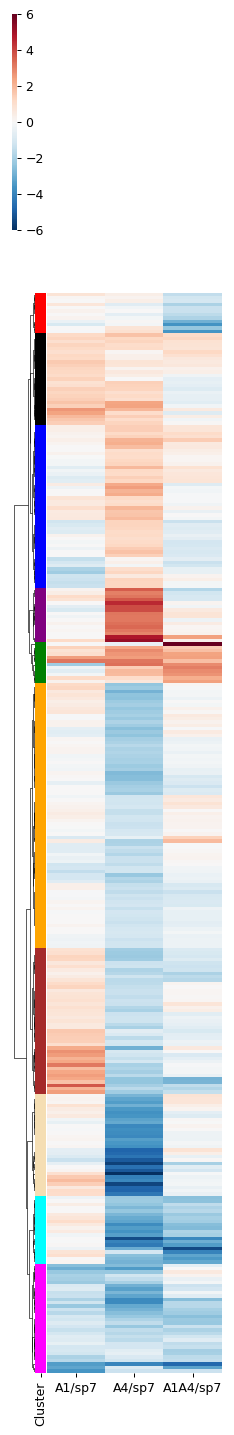

In [4]:
#Now we have our master dataframe, let's plot our heatmap + cluster to see what we got
from scipy.cluster.hierarchy import fcluster, linkage

import matplotlib.pyplot as plt
distanceMatrix = pdist(heatmap_df)
mpl.rcParams['figure.dpi'] = 90
max_d = 10
clusters = fcluster(linkage(distanceMatrix, method='ward'), max_d, criterion='distance')
print(clusters.shape)
cls_pal = dict(zip(np.unique(clusters), sns.color_palette(['r', 'k', 'b', 'purple', 'green', 'orange', 'brown','wheat', 'cyan',
                                                          'magenta'])))
row_colors = pd.Series(clusters, index=heatmap_df.index, name='Cluster').map(cls_pal)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df, col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=False, row_colors=row_colors, vmin=-6, vmax=6,
                  figsize=(3,20))
ax = g.ax_heatmap
ax.set_ylabel('')

In [5]:
heatmap_df = data_frame
reordered_index = g.dendrogram_row.reordered_ind
heatmap_df = heatmap_df.reset_index()
heatmap_df_reordered = heatmap_df.loc[reordered_index].reset_index()
heatmap_df_reordered['cluster'] = clusters[reordered_index] 
df_annotation =df['COG_heatmap']
heatmap_df_reordered['COG_heatmap'] =list(df_annotation[reordered_index])
heatmap_df_reordered

level_0                                              index        A1/sp7  \
0        216        A0A0P0EJG7 Apolipoprotein N-acyltransferase  8.392062e-01   
1         35             A0A0P0F777 NADH-quinone oxidoreductase  1.276823e-01   
2        134                   A0A0P0EQA0 Magnesium transporter  3.884864e-02   
3        178    A0A0P0EW78 Chemotaxis phosphatase, CheZ (CheZ6)  7.040185e-01   
4         46  A0A060DMM6 Nitrogen fixation protein FixU - nifT   0.000000e+00   
5        299              A0A0P0ENJ2 HAMP containing MCP (Tlp2)  2.711456e-01   
6         54         A0A0P0F545 Methylcrotonoyl-CoA carboxylase  1.663061e-02   
7        242          A0A0P0FAN0 Coproporphyrinogen-111 oxidase  2.173617e-01   
8         77                            A0A060DPZ0 Rubrerythrin -4.214237e-01   
9        251   A0A0P0F5X0 GntR family transcriptional regulator -9.588226e-01   
10       112                A0A0P0EKJ7 Molecular chaperone TorD  3.023359e-12   
11       116  A0A0P0ECH3 Amino acid ABC transporter substrat... -8.073118e-02   
12       123  A0A0P0ETX0 ABC transporter substrate-binding p...  1.176906e+00   
13       124  A0A0P0EFJ3 Sulfate/thiosulfate transporter per...  1.340151e+00   
14       300              A0A0N7I7Z5 Chemotaxis protein (Mcp20)  1.015431e+00   
15        24               A0A0P0ET22 Bifunctional protein GImU  1.355664e+00   
16       224  A0A0P0E9B8 Dimeric alpha-beta barrel containin...  1.207134e+00   
17       162  A0A0N7I7T7 Phosphoadenosine phosphosulfate red...  1.030172e+00   
18        33                            A0A0P0F9H3 Cytochrome C  1.241611e+00   
19       106                            A0A0P0FEI6 Peptidase M3  1.217542e+00   
20        48  A0A0P0EW58 Glutamine-dependent NAD(+) synthetase   1.579296e+00   
21       210               A0A0P0EXG9 Hydroxypyruvate reductase  1.414015e+00   
22       107                           A0A0P0EVR8 Peptidase M20  1.289569e+00   
23       225     A0A0P0EBQ4 Iron-sulfur cluster carrier protein  1.223142e+00   
24        64        A0A0P0F7W0 Histidinol phosphate phosphatase  1.138952e+00   
25       142       A0A0P0EPF4 Iron deficiency-induced protein A  1.364369e+00   
26       250  A0A0N7I8Z8 Pectin lyase fold/virulence factor ...  9.179392e-01   
27       265                A0A0P0F5C7  Uncharacterized protein  1.004820e+00   
28       122                A0A0N7I8Z5 ABC transporter permease  1.443805e+00   
29       187                               A0A0P0EWI4 Regulator  1.289978e+00   
..       ...                                                ...           ...   
288        6      A0A0P0ELL3 Restriction endonuclease subunit M -2.265938e+00   
289      138          A0A0P0EWF4 Biotin-lipoyl like transporter -1.938081e+00   
290      139                  A0A0P0FBI2 Preprotein translocase -2.050169e+00   
291      189                               A0A0P0F753 Regulator -2.206415e+00   
292       50                A0A0P0ECV7 Nitronate monooxygenase  -9.235345e-01   
293      247      A0A0P0FEX6 Pectin lyase fold/virulence factor -7.901583e-01   
294       16              A0A0P0FAG2 MBL fold metallo-hydrolase -1.363651e+00   
295      179                     A0A0N7I7V0 Diguanylate cyclase -1.358718e+00   
296      205                         A0A0P0F526 Isochorismatase -1.917009e+00   
297      206                        A0A0P0ERM0 Beta-qlucosidase -1.242767e+00   
298      317                         A0A0P0EMF0 NUDIX hydrolase -2.281589e+00   
299       15       A0A0P0EKD2 AMP nucleosidase (EC 3.2.2.4) amn -1.271366e+00   
300      240  A0A0P0F242 GTPase HfIX (GTP-binding protein HfIX) -1.658508e+00   
301      277                 A0A0P0EUM6 Uncharacterized protein -9.936706e-01   
302       44          A0A0P0EMA4 Nitrogen fixation protein NifO -1.127544e+00   
303       89        A0A060DTF2 Ferric uptake regulation protein -7.737737e-01   
304      173              A0A0P0EXH8 Chemotaxis protein (Mcp10) -1.078561e+00   
305      137                        

(-5.5, 5.5)

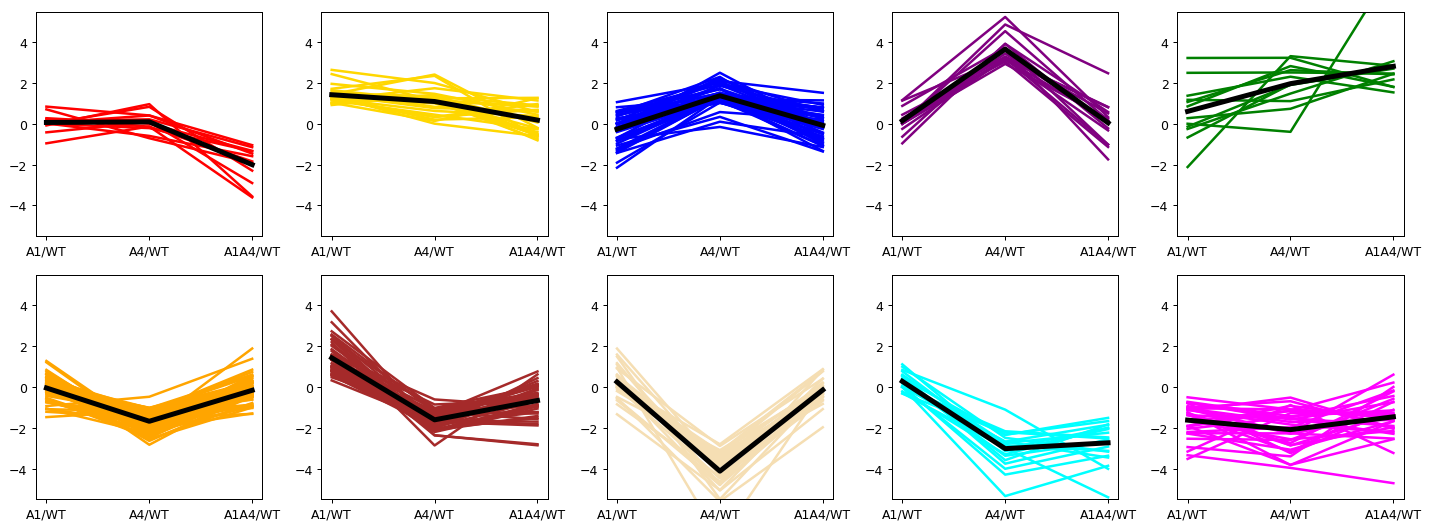

In [11]:
fig, [(ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9, ax10)] = plt.subplots(nrows=2, ncols = 5, figsize = (16,6),
                                                                              tight_layout=True)
y= heatmap_df_reordered[heatmap_df_reordered['cluster']==1][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax1.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='red', linewidth=2)
ax1.set_ylim(-4,4)
ax1.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)


y= heatmap_df_reordered[heatmap_df_reordered['cluster']==2][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax2.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='gold', linewidth=2)
ax2.set_ylim(-4,4)
ax2.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==3][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax3.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='blue', linewidth=2)
ax3.set_ylim(-4,4)
ax3.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==4][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax4.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='purple', linewidth=2)
ax4.set_ylim(-6,6)
ax4.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==5][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax5.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='green', linewidth=2)
ax5.set_ylim(-4,4)
ax5.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==6][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax6.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='orange', linewidth=2)
ax6.set_ylim(-4,4)
ax6.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==7][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax7.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='brown', linewidth=2)
ax7.set_ylim(-4,4)
ax7.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==8][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax8.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='wheat', linewidth=2)
ax8.set_ylim(-7,7)
ax8.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==9][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax9.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='cyan', linewidth=2)
ax9.set_ylim(-7,7)
ax9.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

y= heatmap_df_reordered[heatmap_df_reordered['cluster']==10][['A1/sp7','A4/sp7','A1A4/sp7']].T
ax10.plot(['A1/WT', 'A4/WT', 'A1A4/WT'], y, color='magenta', linewidth=2)
ax10.set_ylim(-4,4)
ax10.plot(['A1/WT', 'A4/WT', 'A1A4/WT'],y.mean(axis=1), color='k', linewidth=4)

ax1.set_ylim(-5.5,5.5)
ax2.set_ylim(-5.5,5.5)
ax3.set_ylim(-5.5,5.5)
ax4.set_ylim(-5.5,5.5)
ax5.set_ylim(-5.5,5.5)
ax6.set_ylim(-5.5,5.5)
ax7.set_ylim(-5.5,5.5)
ax8.set_ylim(-5.5,5.5)
ax9.set_ylim(-5.5,5.5)
ax10.set_ylim(-5.5,5.5)

In [7]:
#Setting up replicate heatmap
hello = []
for i, value in enumerate(df['Unnamed: 0']):
    hello.append(value + ' ' + df['description'][i])
df['index'] = hello
df = df.set_index('index', drop=True)
df_heatmap = df[['CheA1/sp7 bio_rep 1','CheA1/sp7 bio_rep 2','CheA1/sp7 bio_rep 3','CheA4/sp7 bio_rep 1',
                'CheA4/sp7 bio_rep 2','CheA4/sp7 bio_rep 3', 'CheA1CheA4/sp7 bio_rep 1','CheA1CheA4/sp7 bio_rep 2',
                'CheA1CheA4/sp7 bio_rep 3']].rename_axis(None)

In [8]:
dict_IDtoclass

{'J': 'Translation, ribosomal structure and biogenesis ',
 'A': 'RNA processing and modification ',
 'K': 'Transcription ',
 'L': 'Replication, recombination and repair ',
 'B': 'Chromatin structure and dynamics ',
 'D': 'Cell cycle control, cell division, chromosome partitioning ',
 'Y': 'Nuclear structure ',
 'V': 'Defense mechanisms ',
 'T': 'Signal transduction mechanisms ',
 'M': 'Cell wall/membrane/envelope biogenesis ',
 'N': 'Cell motility ',
 'Z': 'Cytoskeleton ',
 'W': 'Extracellular structures ',
 'U': 'Intracellular trafficking, secretion, and vesicular transport ',
 'O': 'Posttranslational modification, protein turnover, chaperones ',
 'C': 'Energy production and conversion ',
 'G': 'Carbohydrate transport and metabolism ',
 'E': 'Amino acid transport and metabolism ',
 'F': 'Nucleotide transport and metabolism ',
 'H': 'Coenzyme transport and metabolism ',
 'I': 'Lipid transport and metabolism ',
 'P': 'Inorganic ion transport and metabolism ',
 'Q': 'Secondary metabolite

Text(62.16666666666657, 0.5, '')

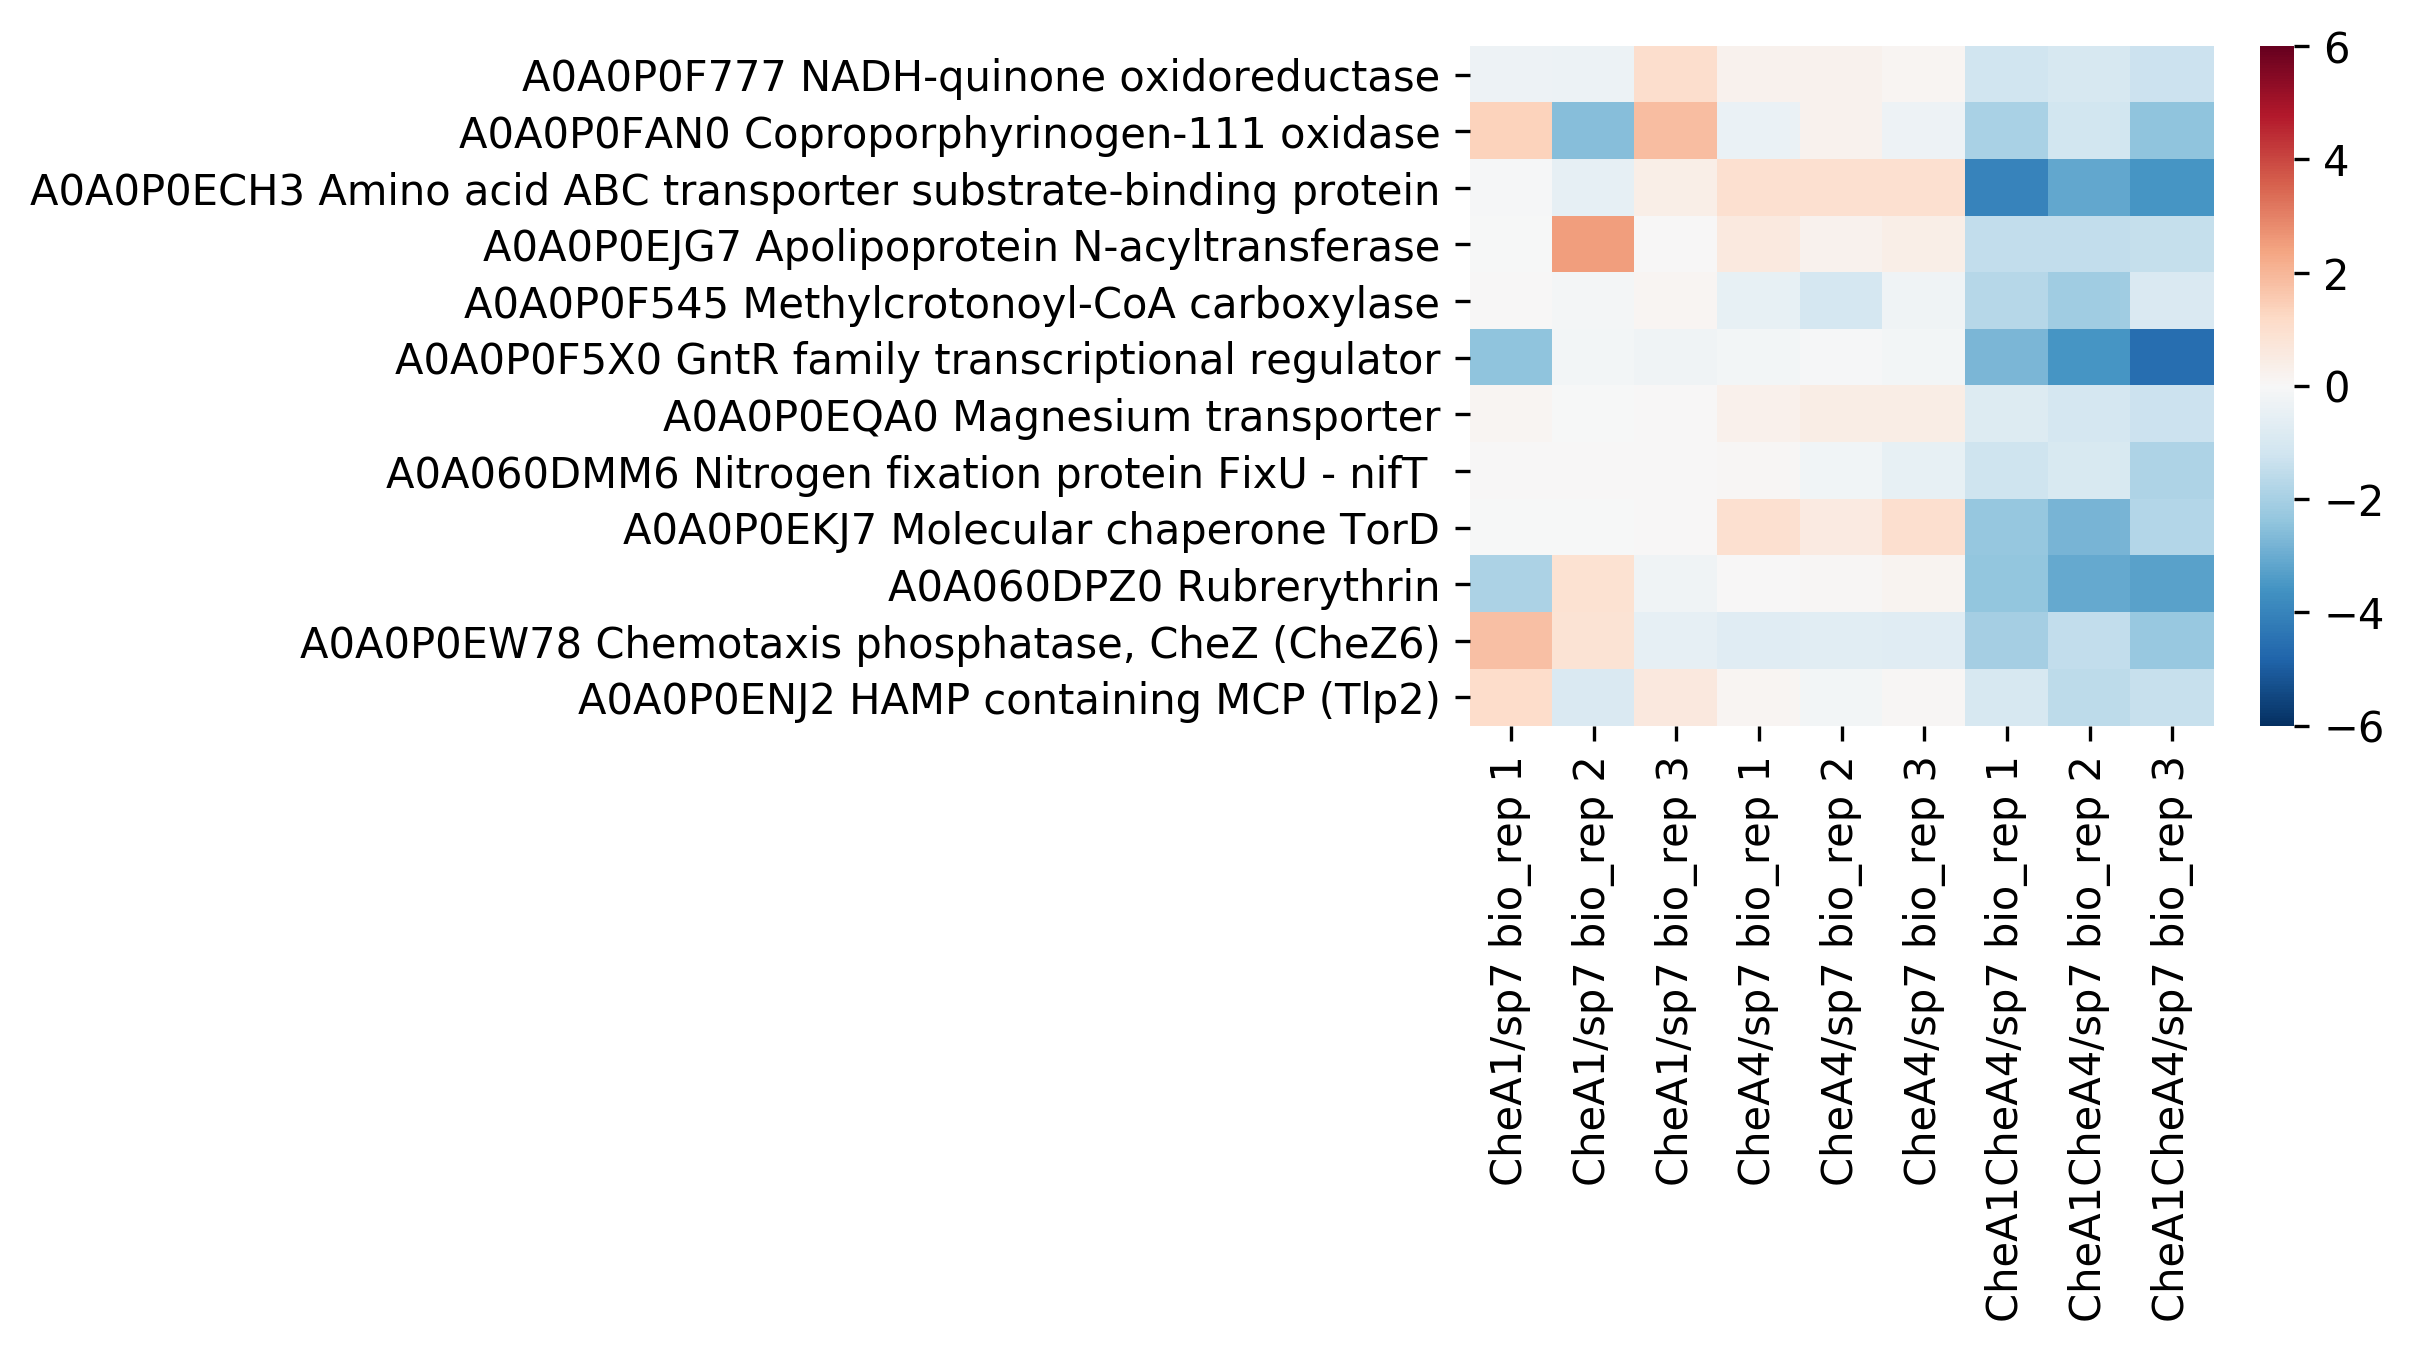

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import re
mpl.rcParams['figure.dpi'] = 300
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==1].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,3))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [10]:
heatmap_df_reordered

level_0                                              index        A1/sp7  \
0        216        A0A0P0EJG7 Apolipoprotein N-acyltransferase  8.392062e-01   
1         35             A0A0P0F777 NADH-quinone oxidoreductase  1.276823e-01   
2        134                   A0A0P0EQA0 Magnesium transporter  3.884864e-02   
3        178    A0A0P0EW78 Chemotaxis phosphatase, CheZ (CheZ6)  7.040185e-01   
4         46  A0A060DMM6 Nitrogen fixation protein FixU - nifT   0.000000e+00   
5        299              A0A0P0ENJ2 HAMP containing MCP (Tlp2)  2.711456e-01   
6         54         A0A0P0F545 Methylcrotonoyl-CoA carboxylase  1.663061e-02   
7        242          A0A0P0FAN0 Coproporphyrinogen-111 oxidase  2.173617e-01   
8         77                            A0A060DPZ0 Rubrerythrin -4.214237e-01   
9        251   A0A0P0F5X0 GntR family transcriptional regulator -9.588226e-01   
10       112                A0A0P0EKJ7 Molecular chaperone TorD  3.023359e-12   
11       116  A0A0P0ECH3 Amino acid ABC transporter substrat... -8.073118e-02   
12       123  A0A0P0ETX0 ABC transporter substrate-binding p...  1.176906e+00   
13       124  A0A0P0EFJ3 Sulfate/thiosulfate transporter per...  1.340151e+00   
14       300              A0A0N7I7Z5 Chemotaxis protein (Mcp20)  1.015431e+00   
15        24               A0A0P0ET22 Bifunctional protein GImU  1.355664e+00   
16       224  A0A0P0E9B8 Dimeric alpha-beta barrel containin...  1.207134e+00   
17       162  A0A0N7I7T7 Phosphoadenosine phosphosulfate red...  1.030172e+00   
18        33                            A0A0P0F9H3 Cytochrome C  1.241611e+00   
19       106                            A0A0P0FEI6 Peptidase M3  1.217542e+00   
20        48  A0A0P0EW58 Glutamine-dependent NAD(+) synthetase   1.579296e+00   
21       210               A0A0P0EXG9 Hydroxypyruvate reductase  1.414015e+00   
22       107                           A0A0P0EVR8 Peptidase M20  1.289569e+00   
23       225     A0A0P0EBQ4 Iron-sulfur cluster carrier protein  1.223142e+00   
24        64        A0A0P0F7W0 Histidinol phosphate phosphatase  1.138952e+00   
25       142       A0A0P0EPF4 Iron deficiency-induced protein A  1.364369e+00   
26       250  A0A0N7I8Z8 Pectin lyase fold/virulence factor ...  9.179392e-01   
27       265                A0A0P0F5C7  Uncharacterized protein  1.004820e+00   
28       122                A0A0N7I8Z5 ABC transporter permease  1.443805e+00   
29       187                               A0A0P0EWI4 Regulator  1.289978e+00   
..       ...                                                ...           ...   
288        6      A0A0P0ELL3 Restriction endonuclease subunit M -2.265938e+00   
289      138          A0A0P0EWF4 Biotin-lipoyl like transporter -1.938081e+00   
290      139                  A0A0P0FBI2 Preprotein translocase -2.050169e+00   
291      189                               A0A0P0F753 Regulator -2.206415e+00   
292       50                A0A0P0ECV7 Nitronate monooxygenase  -9.235345e-01   
293      247      A0A0P0FEX6 Pectin lyase fold/virulence factor -7.901583e-01   
294       16              A0A0P0FAG2 MBL fold metallo-hydrolase -1.363651e+00   
295      179                     A0A0N7I7V0 Diguanylate cyclase -1.358718e+00   
296      205                         A0A0P0F526 Isochorismatase -1.917009e+00   
297      206                        A0A0P0ERM0 Beta-qlucosidase -1.242767e+00   
298      317                         A0A0P0EMF0 NUDIX hydrolase -2.281589e+00   
299       15       A0A0P0EKD2 AMP nucleosidase (EC 3.2.2.4) amn -1.271366e+00   
300      240  A0A0P0F242 GTPase HfIX (GTP-binding protein HfIX) -1.658508e+00   
301      277                 A0A0P0EUM6 Uncharacterized protein -9.936706e-01   
302       44          A0A0P0EMA4 Nitrogen fixation protein NifO -1.127544e+00   
303       89        A0A060DTF2 Ferric uptake regulation protein -7.737737e-01   
304      173              A0A0P0EXH8 Chemotaxis protein (Mcp10) -1.078561e+00   
305      137                        

Text(62.16666666666657, 0.5, '')

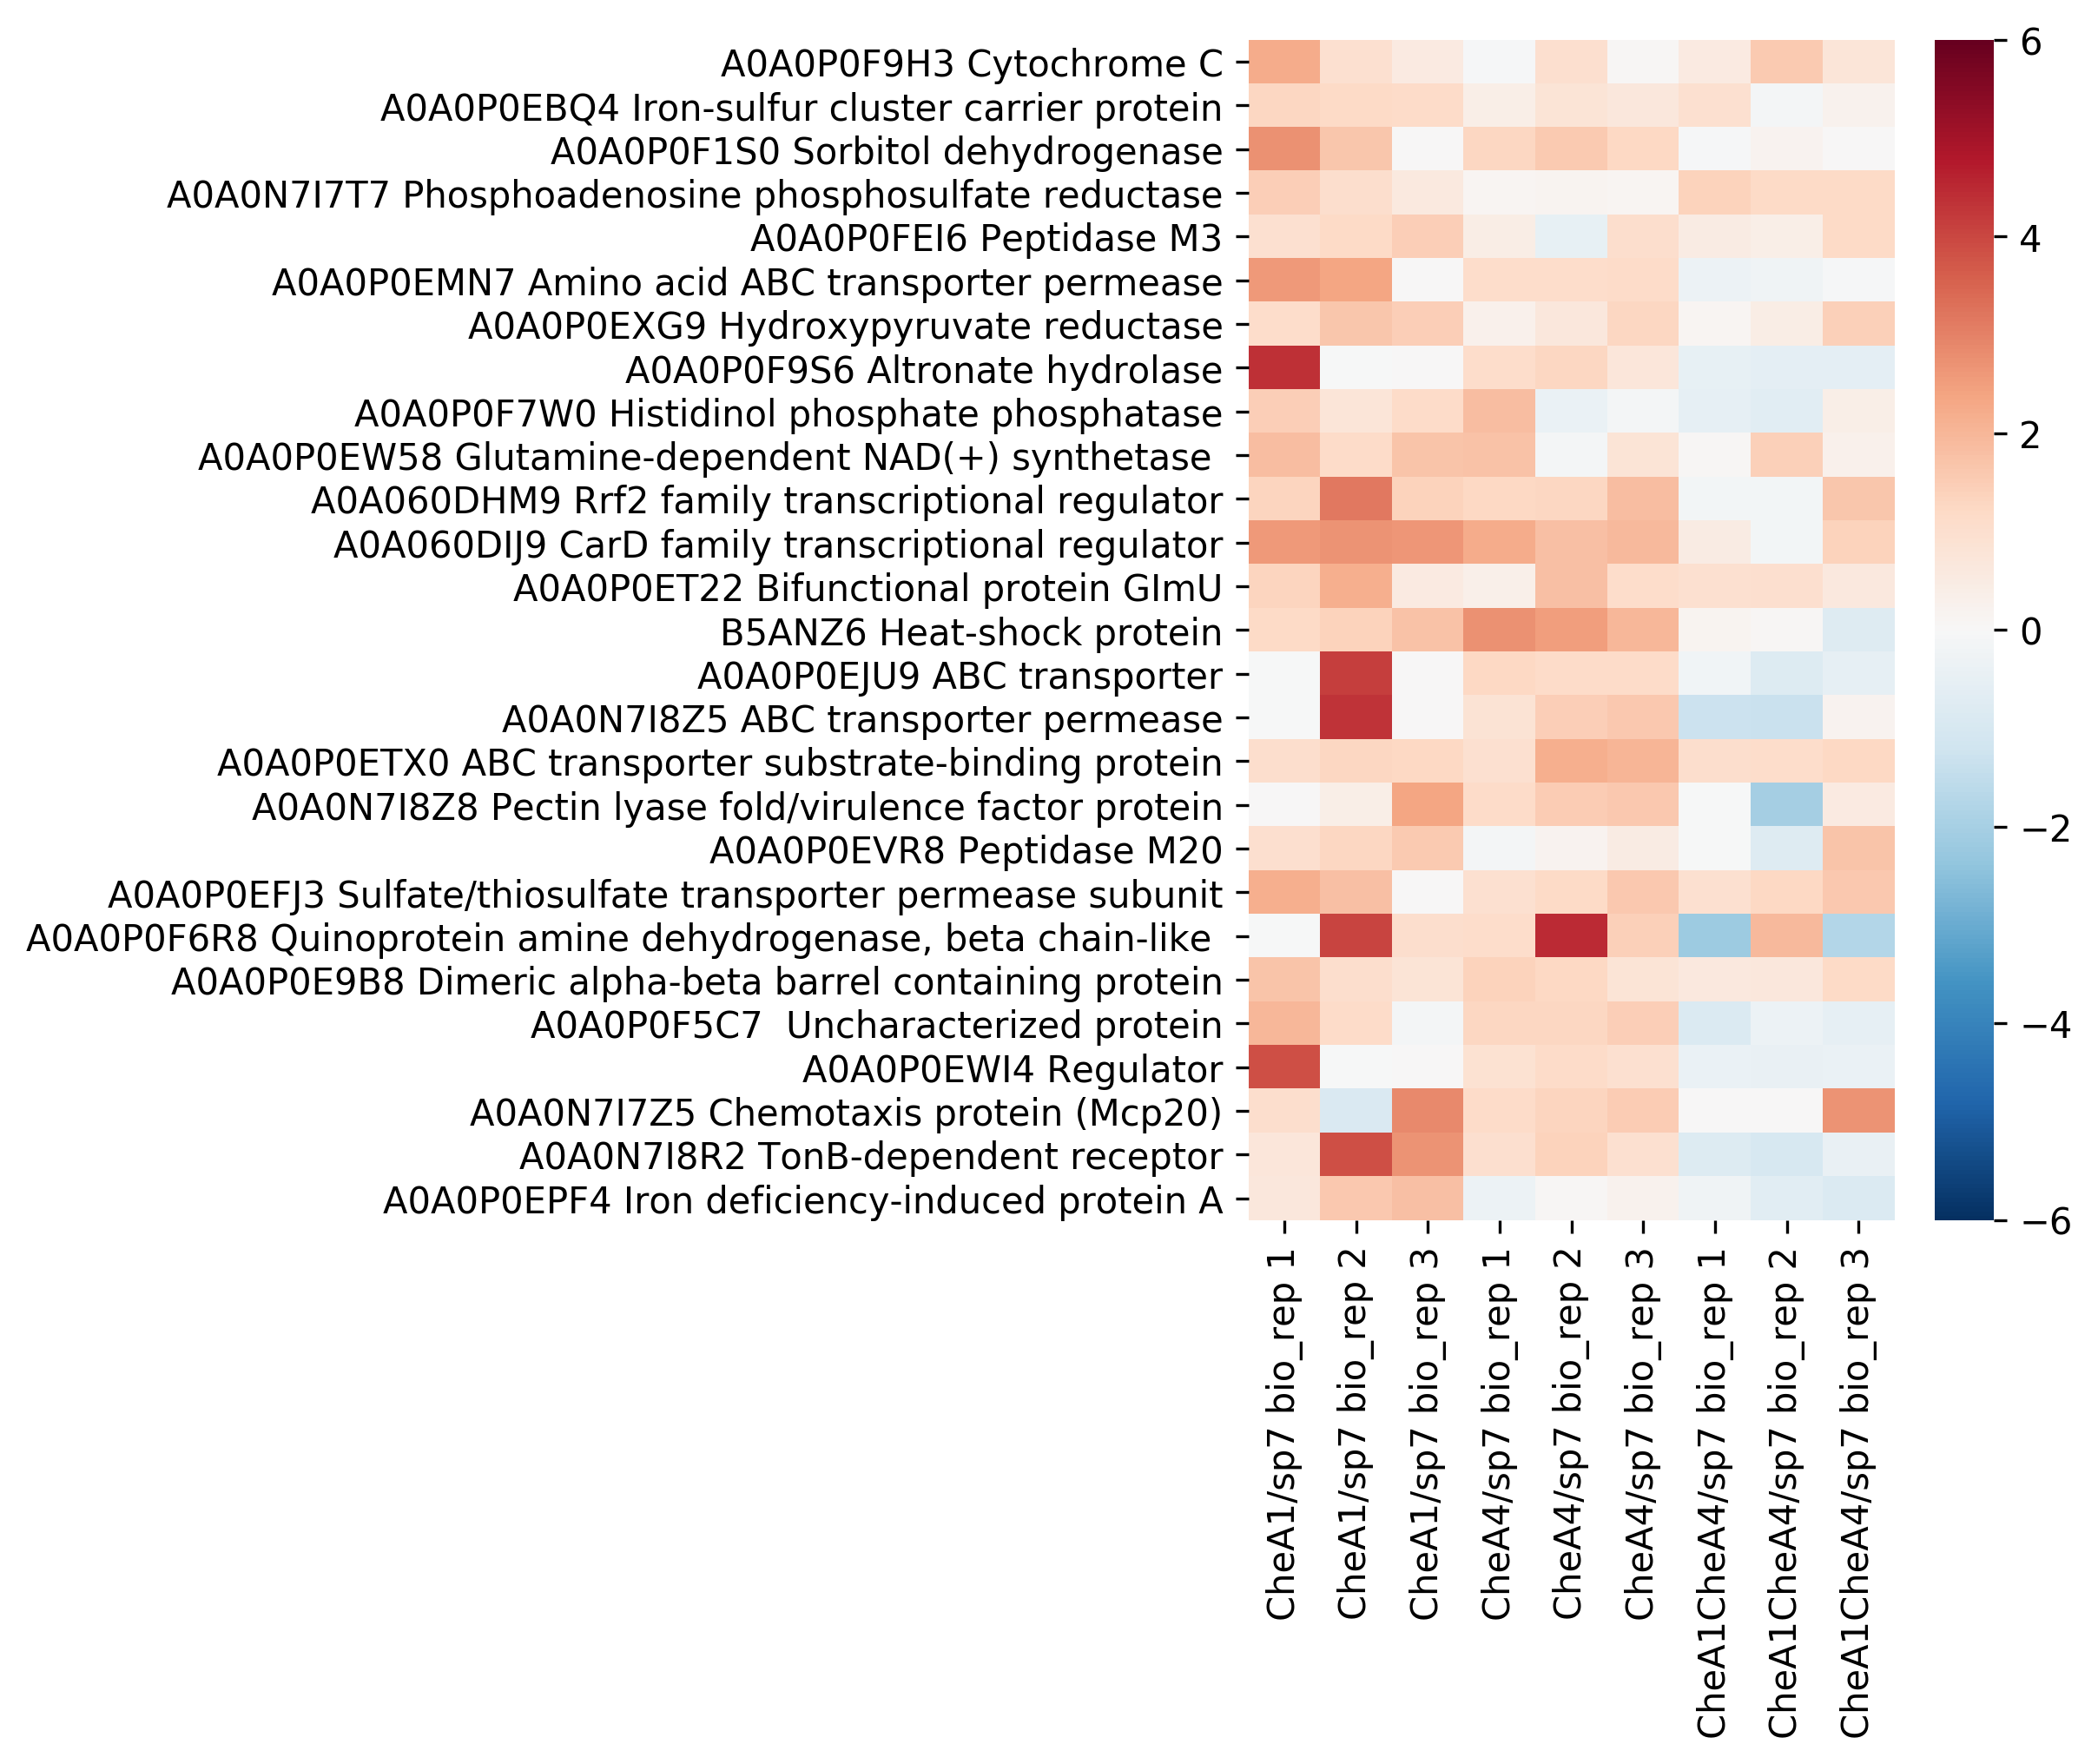

In [11]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==2].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,6))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [12]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==2].sort_values('COG_heatmap')
hi

level_0                                              index    A1/sp7  \
18       33                            A0A0P0F9H3 Cytochrome C  1.241611   
23      225     A0A0P0EBQ4 Iron-sulfur cluster carrier protein  1.223142   
38      204                  A0A0P0F1S0 Sorbitol dehydrogenase  1.478043   
17      162  A0A0N7I7T7 Phosphoadenosine phosphosulfate red...  1.030172   
19      106                            A0A0P0FEI6 Peptidase M3  1.217542   
37      130     A0A0P0EMN7 Amino acid ABC transporter permease  1.643678   
21      210               A0A0P0EXG9 Hydroxypyruvate reductase  1.414015   
31      203                     A0A0P0F9S6 Altronate hydrolase  1.460807   
24       64        A0A0P0F7W0 Histidinol phosphate phosphatase  1.138952   
20       48  A0A0P0EW58 Glutamine-dependent NAD(+) synthetase   1.579296   
36       91   A0A060DHM9 Rrf2 family transcriptional regulator  1.955168   
34       90   A0A060DIJ9 CarD family transcriptional regulator  2.639323   
15       24               A0A0P0ET22 Bifunctional protein GImU  1.355664   
33      105                          B5ANZ6 Heat-shock protein  1.443777   
30      121                         A0A0P0EJU9 ABC transporter  1.376940   
28      122                A0A0N7I8Z5 ABC transporter permease  1.443805   
12      123  A0A0P0ETX0 ABC transporter substrate-binding p...  1.176906   
26      250  A0A0N7I8Z8 Pectin lyase fold/virulence factor ...  0.917939   
22      107                           A0A0P0EVR8 Peptidase M20  1.289569   
13      124  A0A0P0EFJ3 Sulfate/thiosulfate transporter per...  1.340151   
32       60  A0A0P0F6R8 Quinoprotein amine dehydrogenase, b...  1.712061   
16      224  A0A0P0E9B8 Dimeric alpha-beta barrel containin...  1.207134   
27      265                A0A0P0F5C7  Uncharacterized protein  1.004820   
29      187                               A0A0P0EWI4 Regulator  1.289978   
14      300              A0A0N7I7Z5 Chemotaxis protein (Mcp20)  1.015431   
35      257                 A0A0N7I8R2 TonB-dependent receptor  2.433097   
25      142       A0A0P0EPF4 Iron deficiency-induced protein A  1.364369   

      A4/sp7  A1A4/sp7  cluster COG_heatmap  
18  0.338742  0.968809        2           C  
23  0.628995  0.377195        2           D  
38  1.351345  0.060439        2           E  
17  0.136632  1.248570        2           E  
19  0.332302  0.682435        2           E  
37  1.118176 -0.223824        2           E  
21  0.763845  0.663578        2           G  
31  1.030486 -0.546390        2           G  
24  0.446467 -0.273733        2           G  
20  0.827020  0.595686        2           H  
36  1.465651  0.443013        2           K  
34  1.994765  0.577733        2           K  
15  1.093570  0.864070        2           M  
33  2.411182 -0.198853        2           O  
30  1.178785 -0.532105        2           R  
28  1.326591 -0.811993        2           R  
12  1.740880  1.138147        2           R  
26  1.426814 -0.511755        2           R  
22  0.203302  0.314902        2           R  
13  1.246286  1.269913        2           R  
32  2.348471 -0.656759        2           S  
16  1.164793  0.840360        2           S  
27  1.370945 -0.597583        2           S  
29  1.001739 -0.412629        2           T  
14  1.346433  0.904792        2           T  
35  1.113844 -0.752403        2           T  
25  0.004794 -0.604206        2           V

Text(61.16666666666657, 0.5, '')

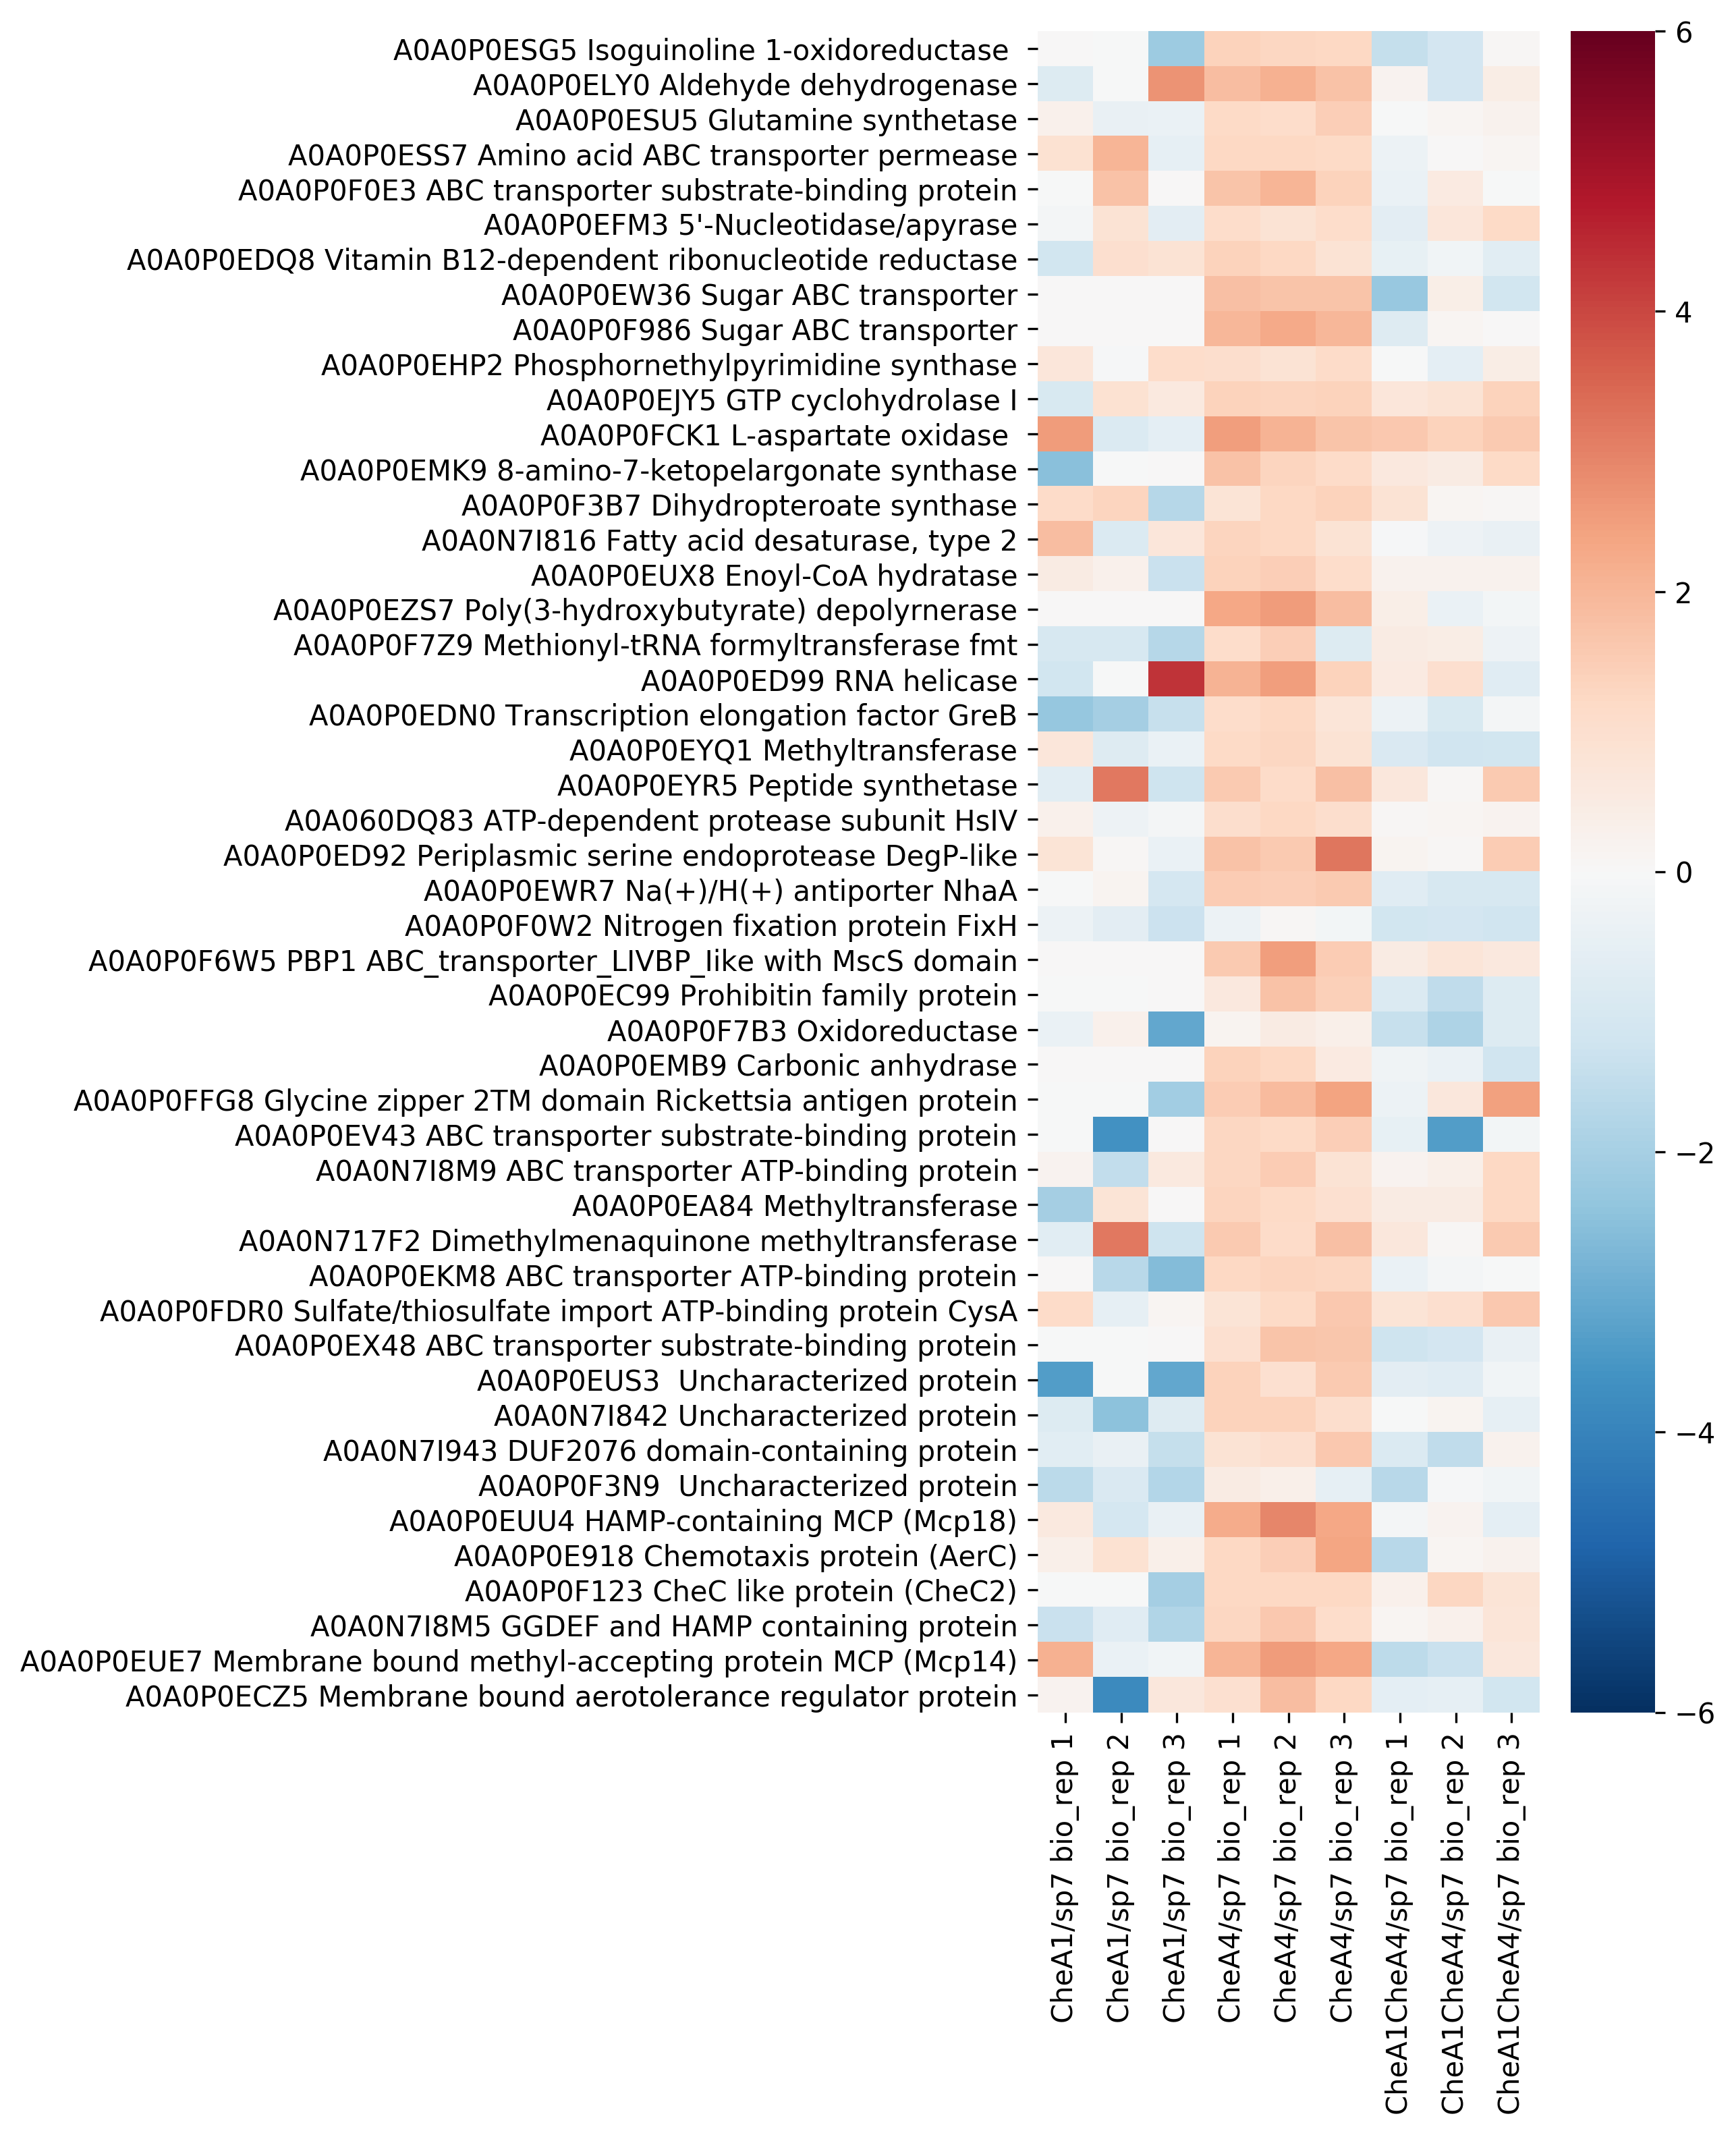

In [13]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==3].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,11))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [14]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==3].sort_values('COG_heatmap')
hi

level_0                                              index        A1/sp7  \
69       65          A0A0P0ESG5 Isoguinoline 1-oxidoreductase  -7.188453e-01   
66      223                  A0A0P0ELY0 Aldehyde dehydrogenase  6.300358e-01   
49       47                    A0A0P0ESU5 Glutamine synthetase -1.719219e-01   
60      132     A0A0P0ESS7 Amino acid ABC transporter permease  8.101056e-01   
65      131  A0A0P0F0E3 ABC transporter substrate-binding p...  5.882324e-01   
46       10                 A0A0P0EFM3 5'-Nucleotidase/apyrase  3.903282e-02   
71       11  A0A0P0EDQ8 Vitamin B12-dependent ribonucleotid...  2.485199e-01   
76      133                   A0A0P0EW36 Sugar ABC transporter  0.000000e+00   
58      126                   A0A0P0F986 Sugar ABC transporter  0.000000e+00   
61       12       A0A0P0EHP2 Phosphornethylpyrimidine synthase  5.843440e-01   
42      164                    A0A0P0EJY5 GTP cyclohydrolase I  1.720021e-01   
43       62                    A0A0P0FCK1 L-aspartate oxidase   3.608266e-01   
54      163      A0A0P0EMK9 8-amino-7-ketopelargonate synthase -8.424001e-01   
47      165                A0A0P0F3B7 Dihydropteroate synthase  2.503104e-01   
62      310           A0A0N7I816 Fatty acid desaturase, type 2  5.782172e-01   
50      217                     A0A0P0EUX8 Enoyl-CoA hydratase -1.760758e-01   
59      202   A0A0P0EZS7 Poly(3-hydroxybutyrate) depolyrnerase  0.000000e+00   
83      110    A0A0P0F7Z9 Methionyl-tRNA formyltransferase fmt -1.233752e+00   
63        7                            A0A0P0ED99 RNA helicase  1.060312e+00   
81        8    A0A0P0EDN0 Transcription elongation factor GreB -1.906340e+00   
73        9                       A0A0P0EYQ1 Methyltransferase -1.456585e-01   
39      166                      A0A0P0EYR5 Peptide synthetase  4.192898e-01   
48      108     A0A060DQ83 ATP-dependent protease subunit HsIV -2.350854e-02   
44      109  A0A0P0ED92 Periplasmic serine endoprotease Deg...  1.738060e-01   
75      135              A0A0P0EWR7 Na(+)/H(+) antiporter NhaA -2.957263e-01   
80       45          A0A0P0F0W2 Nitrogen fixation protein FixH -7.630449e-01   
45      127  A0A0P0F6W5 PBP1 ABC_transporter_LIVBP_Iike wit...  0.000000e+00   
74      155               A0A0P0EC99 Prohibitin family protein  3.023359e-12   
79       34                          A0A0P0F7B3 Oxidoreductase -1.065130e+00   
72       78                      A0A0P0EMB9 Carbonic anhydrase  0.000000e+00   
51      153  A0A0P0FFG8 Glycine zipper 2TM domain Rickettsi... -6.957533e-01   
67      117  A0A0P0EV43 ABC transporter substrate-binding p... -1.209092e+00   
52      129     A0A0N7I8M9 ABC transporter ATP-binding protein -2.278313e-01   
53      227                       A0A0P0EA84 Methyltransferase -4.044939e-01   
40      293   A0A0N717F2 Dimethylmenaquinone methyltransferase  4.192898e-01   
85      125     A0A0P0EKM8 ABC transporter ATP-binding protein -1.422067e+00   
41      128  A0A0P0FDR0 Sulfate/thiosulfate import ATP-bind...  2.470828e-01   
77      136  A0A0P0EX48 ABC transporter substrate-binding p...  3.023359e-12   
82      266                A0A0P0EUS3  Uncharacterized protein -2.153297e+00   
86      268                 A0A0N7I842 Uncharacterized protein -1.350450e+00   
70      226       A0A0N7I943 DUF2076 domain-containing protein -8.428430e-01   
78      267                A0A0P0F3N9  Uncharacterized protein -1.430945e+00   
57      297             A0A0P0EUU4 HAMP-containing MCP (Mcp18) -3.101707e-01   
64      174               A0A0P0E918 Chemotaxis protein (AerC)  5.450506e-01   
55      176               A0A0P0F123 CheC like protein (CheC2) -6.792192e-01   
84      181       A0A0N7I8M5 GGDEF and HAMP containing protein -1.288990e+00   
56      296  A0A0P0EUE7 Membrane bound methyl-accepting pro...  5.050978e-01   
68      249  A0A0P0ECZ5 Membrane bound aerotolerance regula... -9.725319e-01   

      A4/sp7  A1A4/sp7  cluster COG_heatmap  
69  1.301329 -0.817289        3      

Text(62.16666666666657, 0.5, '')

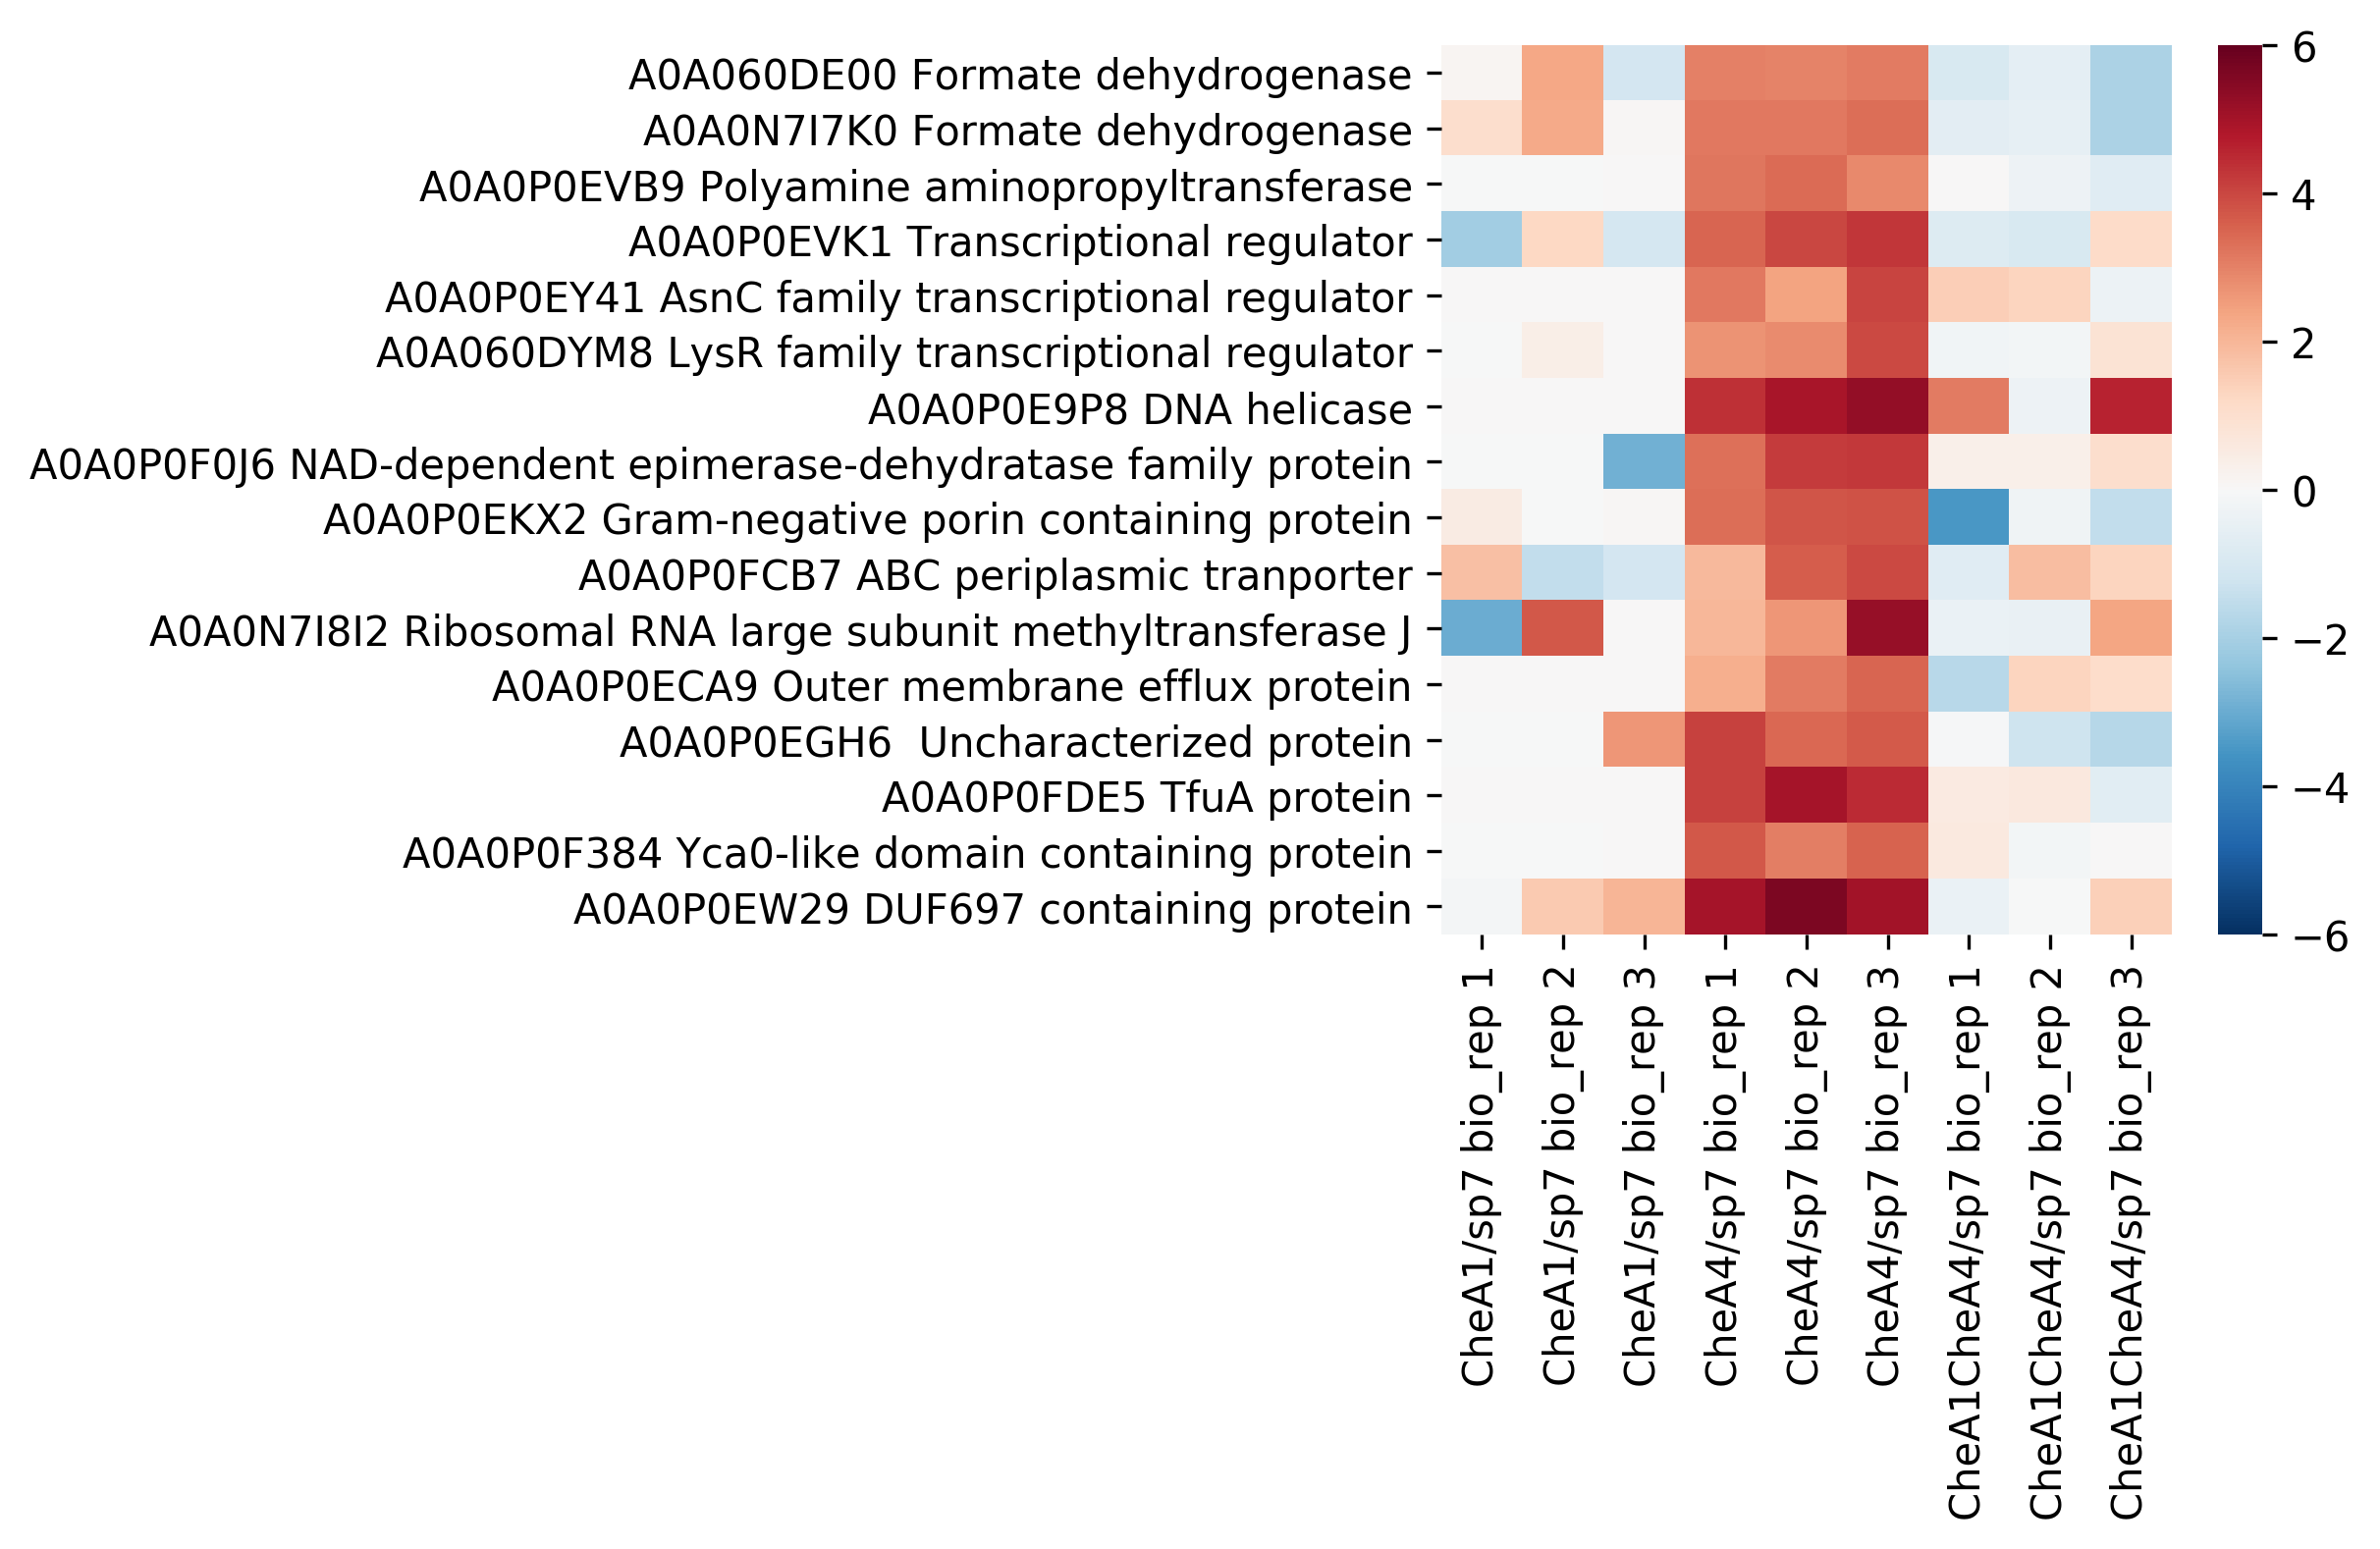

In [15]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==4].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,4))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [16]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==4].sort_values('COG_heatmap')
hi

level_0                                              index        A1/sp7  \
88        29                   A0A060DE00 Formate dehydrogenase  4.425723e-01   
89        30                   A0A0N7I7K0 Formate dehydrogenase  1.135465e+00   
96        63        A0A0P0EVB9 Polyamine aminopropyltransferase  3.023359e-12   
92        92               A0A0P0EVK1 Transcriptional regulator -6.336916e-01   
94        94   A0A0P0EY41 AsnC family transcriptional regulator  0.000000e+00   
99        93   A0A060DYM8 LysR family transcriptional regulator  1.373401e-01   
101        5                            A0A0P0E9P8 DNA helicase  0.000000e+00   
93       214  A0A0P0F0J6 NAD-dependent epimerase-dehydratase... -9.598983e-01   
87       119  A0A0P0EKX2 Gram-negative porin containing protein  1.888894e-01   
95       120              A0A0P0FCB7 ABC periplasmic tranporter -2.510554e-01   
97       104  A0A0N7I8I2 Ribosomal RNA large subunit methylt...  2.576138e-01   
100      256           A0A0P0ECA9 Outer membrane efflux protein  0.000000e+00   
90       264                A0A0P0EGH6  Uncharacterized protein  8.754864e-01   
91        68                            A0A0P0FDE5 TfuA protein  0.000000e+00   
98        80     A0A0P0F384 Yca0-like domain containing protein  3.023359e-12   
102      221               A0A0P0EW29 DUF697 containing protein  1.158422e+00   

       A4/sp7  A1A4/sp7  cluster COG_heatmap  
88   3.043761 -1.136906        4           C  
89   3.217913 -1.018734        4           C  
96   3.152899 -0.325707        4           E  
92   3.915929 -0.221388        4           K  
94   3.199583  0.820216        4           K  
99   3.160534  0.156379        4           K  
101  4.863090  2.473754        4           L  
93   3.915112  0.576396        4           M  
87   3.642025 -1.745664        4           R  
95   3.181898  0.805890        4           R  
97   3.295318  0.509374        4           R  
100  2.933289  0.251611        4           R  
90   3.731871 -1.019830        4           S  
91   4.537111  0.163362        4           S  
98   3.439334  0.131963        4           S  
102  5.231932  0.326093        4           S

Text(62.16666666666657, 0.5, '')

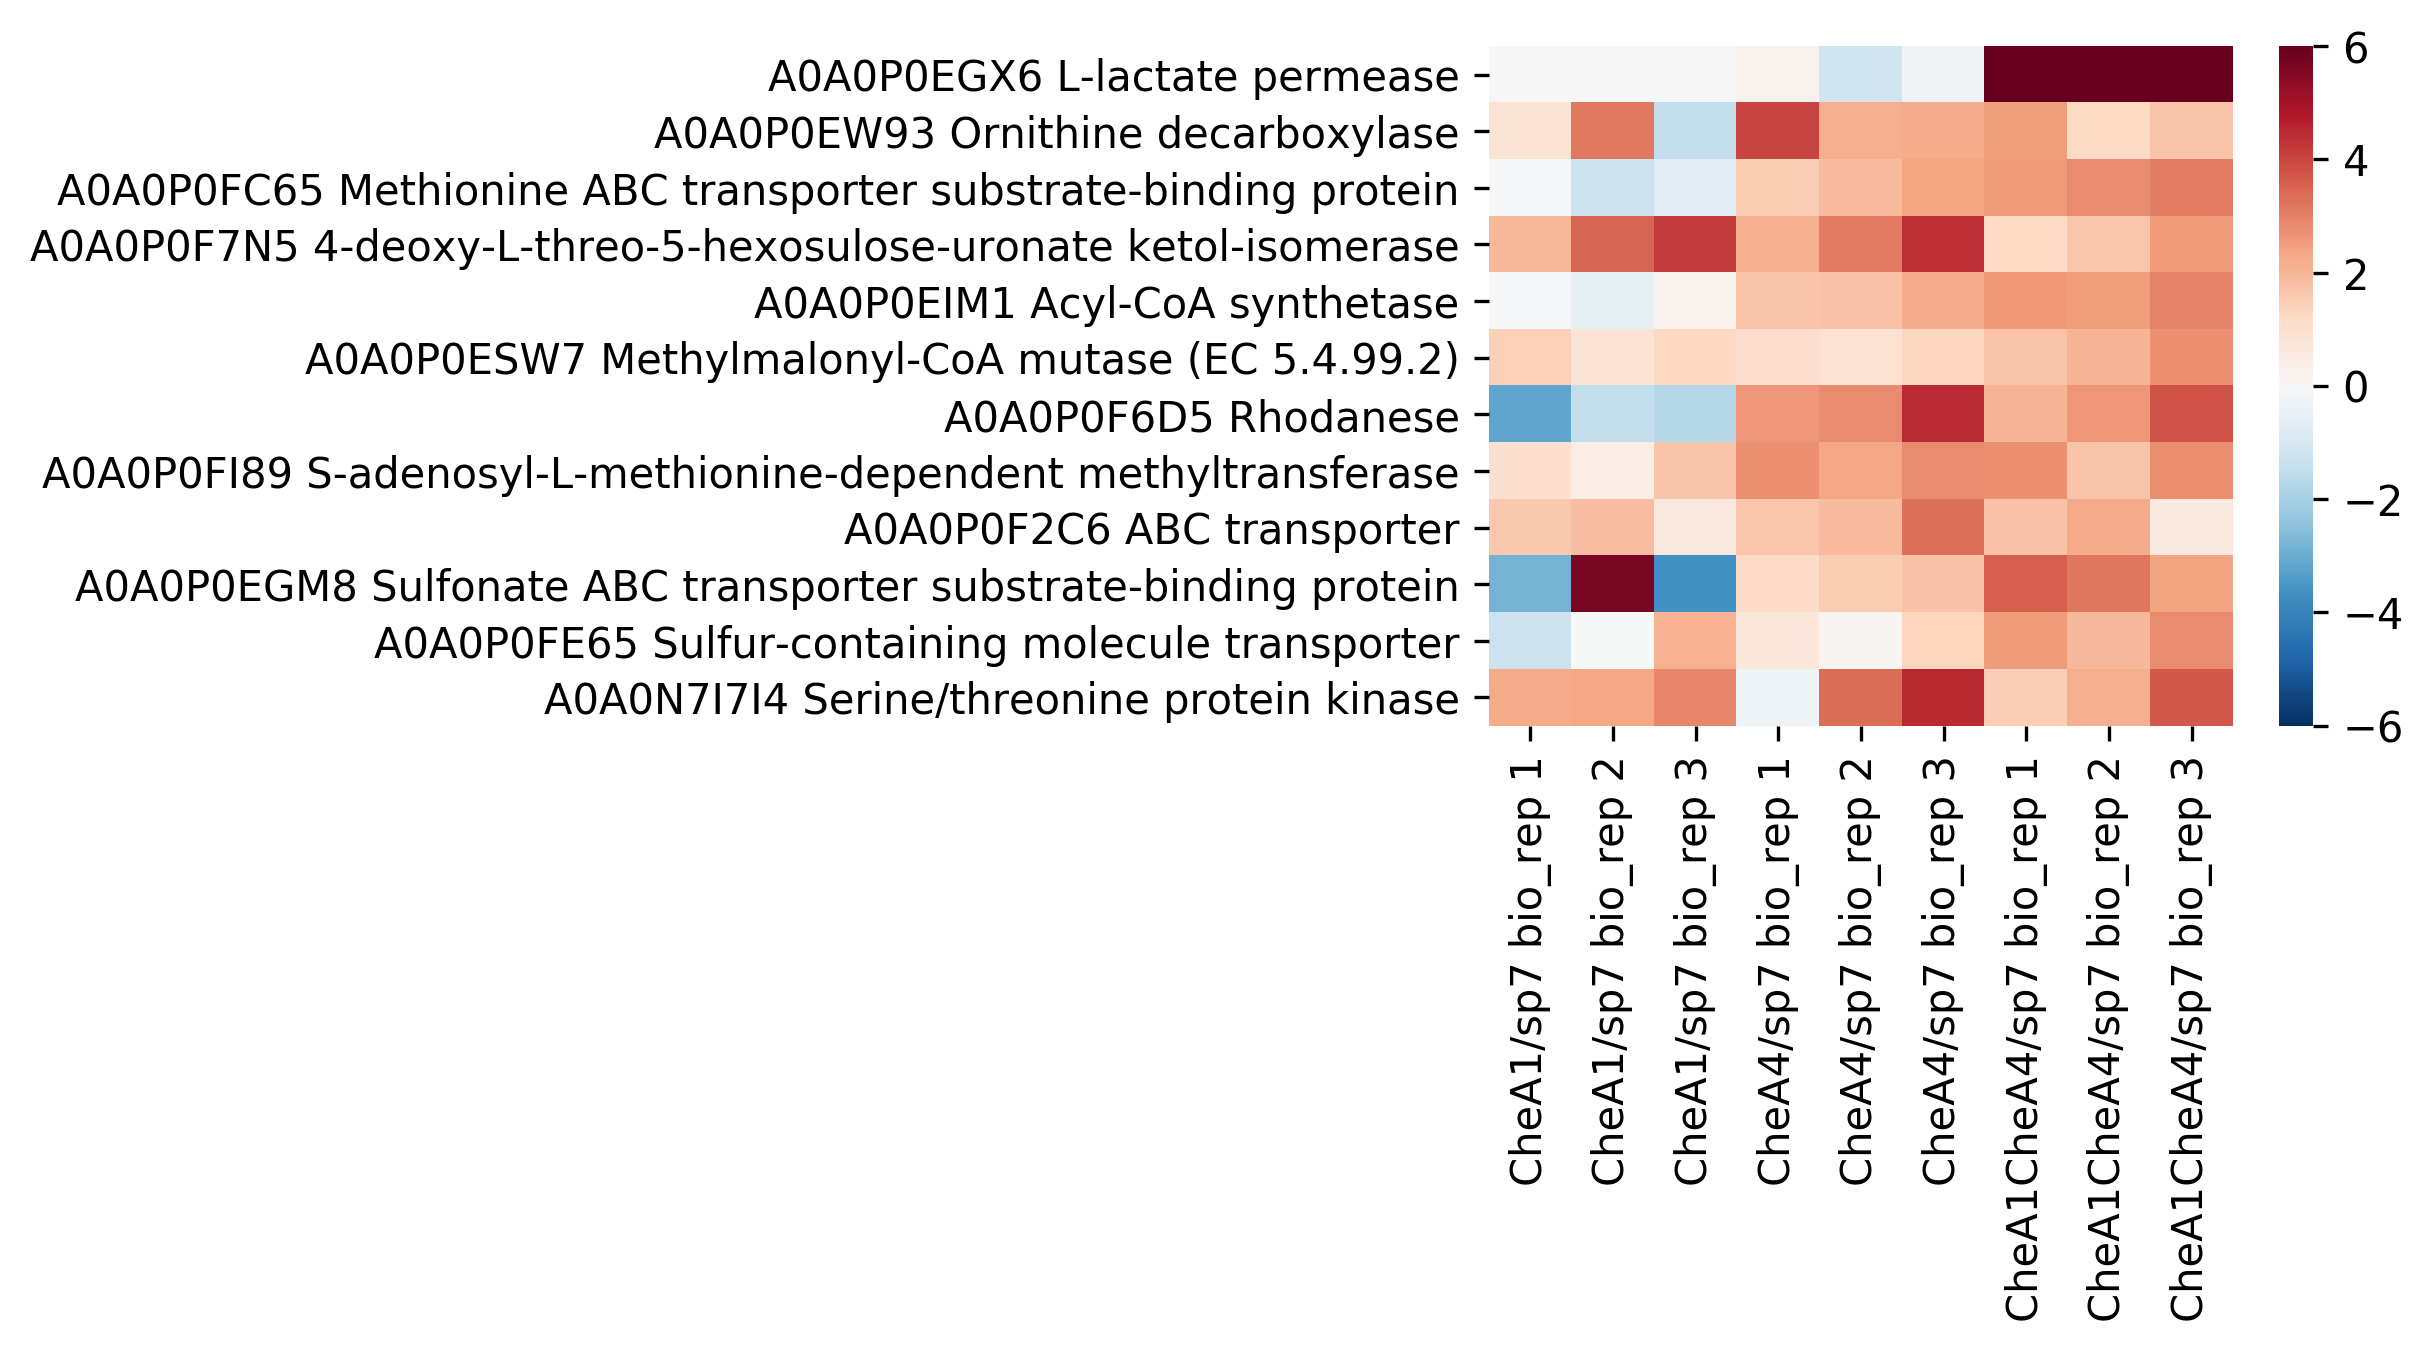

In [17]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==5].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,3))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [18]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==5].sort_values('COG_heatmap')
hi

level_0                                              index    A1/sp7  \
103      113                      A0A0P0EGX6 L-lactate permease  0.000000   
105       61                 A0A0P0EW93 Ornithine decarboxylase  0.850809   
111      118  A0A0P0FC65 Methionine ABC transporter substrat... -0.673928   
108      307  A0A0P0F7N5 4-deoxy-L-threo-5-hexosulose-uronat...  3.223108   
112      209                     A0A0P0EIM1 Acyl-CoA synthetase -0.141404   
113      201  A0A0P0ESW7 Methylmalonyl-CoA mutase (EC 5.4.99.2)  1.173230   
109      222                               A0A0P0F6D5 Rhodanese -2.120949   
106       66  A0A0P0FI89 S-adenosyl-L-methionine-dependent m...  1.066611   
104      258                         A0A0P0F2C6 ABC transporter  1.373989   
110      115  A0A0P0EGM8 Sulfonate ABC transporter substrate... -0.255413   
114      255  A0A0P0FE65 Sulfur-containing molecule transporter  0.272704   
107      182         A0A0N7I7I4 Serine/threonine protein kinase  2.494661   

       A4/sp7  A1A4/sp7  cluster COG_heatmap  
103 -0.396201  7.691111        5           C  
105  2.825376  1.808989        5           E  
111  1.931049  2.814140        5           E  
108  3.231215  1.800215        5           G  
112  1.902961  2.700393        5           I  
113  1.108546  2.170679        5           I  
109  3.311817  2.839005        5           P  
106  2.627908  2.418975        5           Q  
104  2.304752  1.536319        5           R  
110  1.479359  3.062080        5           R  
114  0.733415  2.449797        5           R  
107  2.512731  2.459531        5           T

Text(62.16666666666656, 0.5, '')

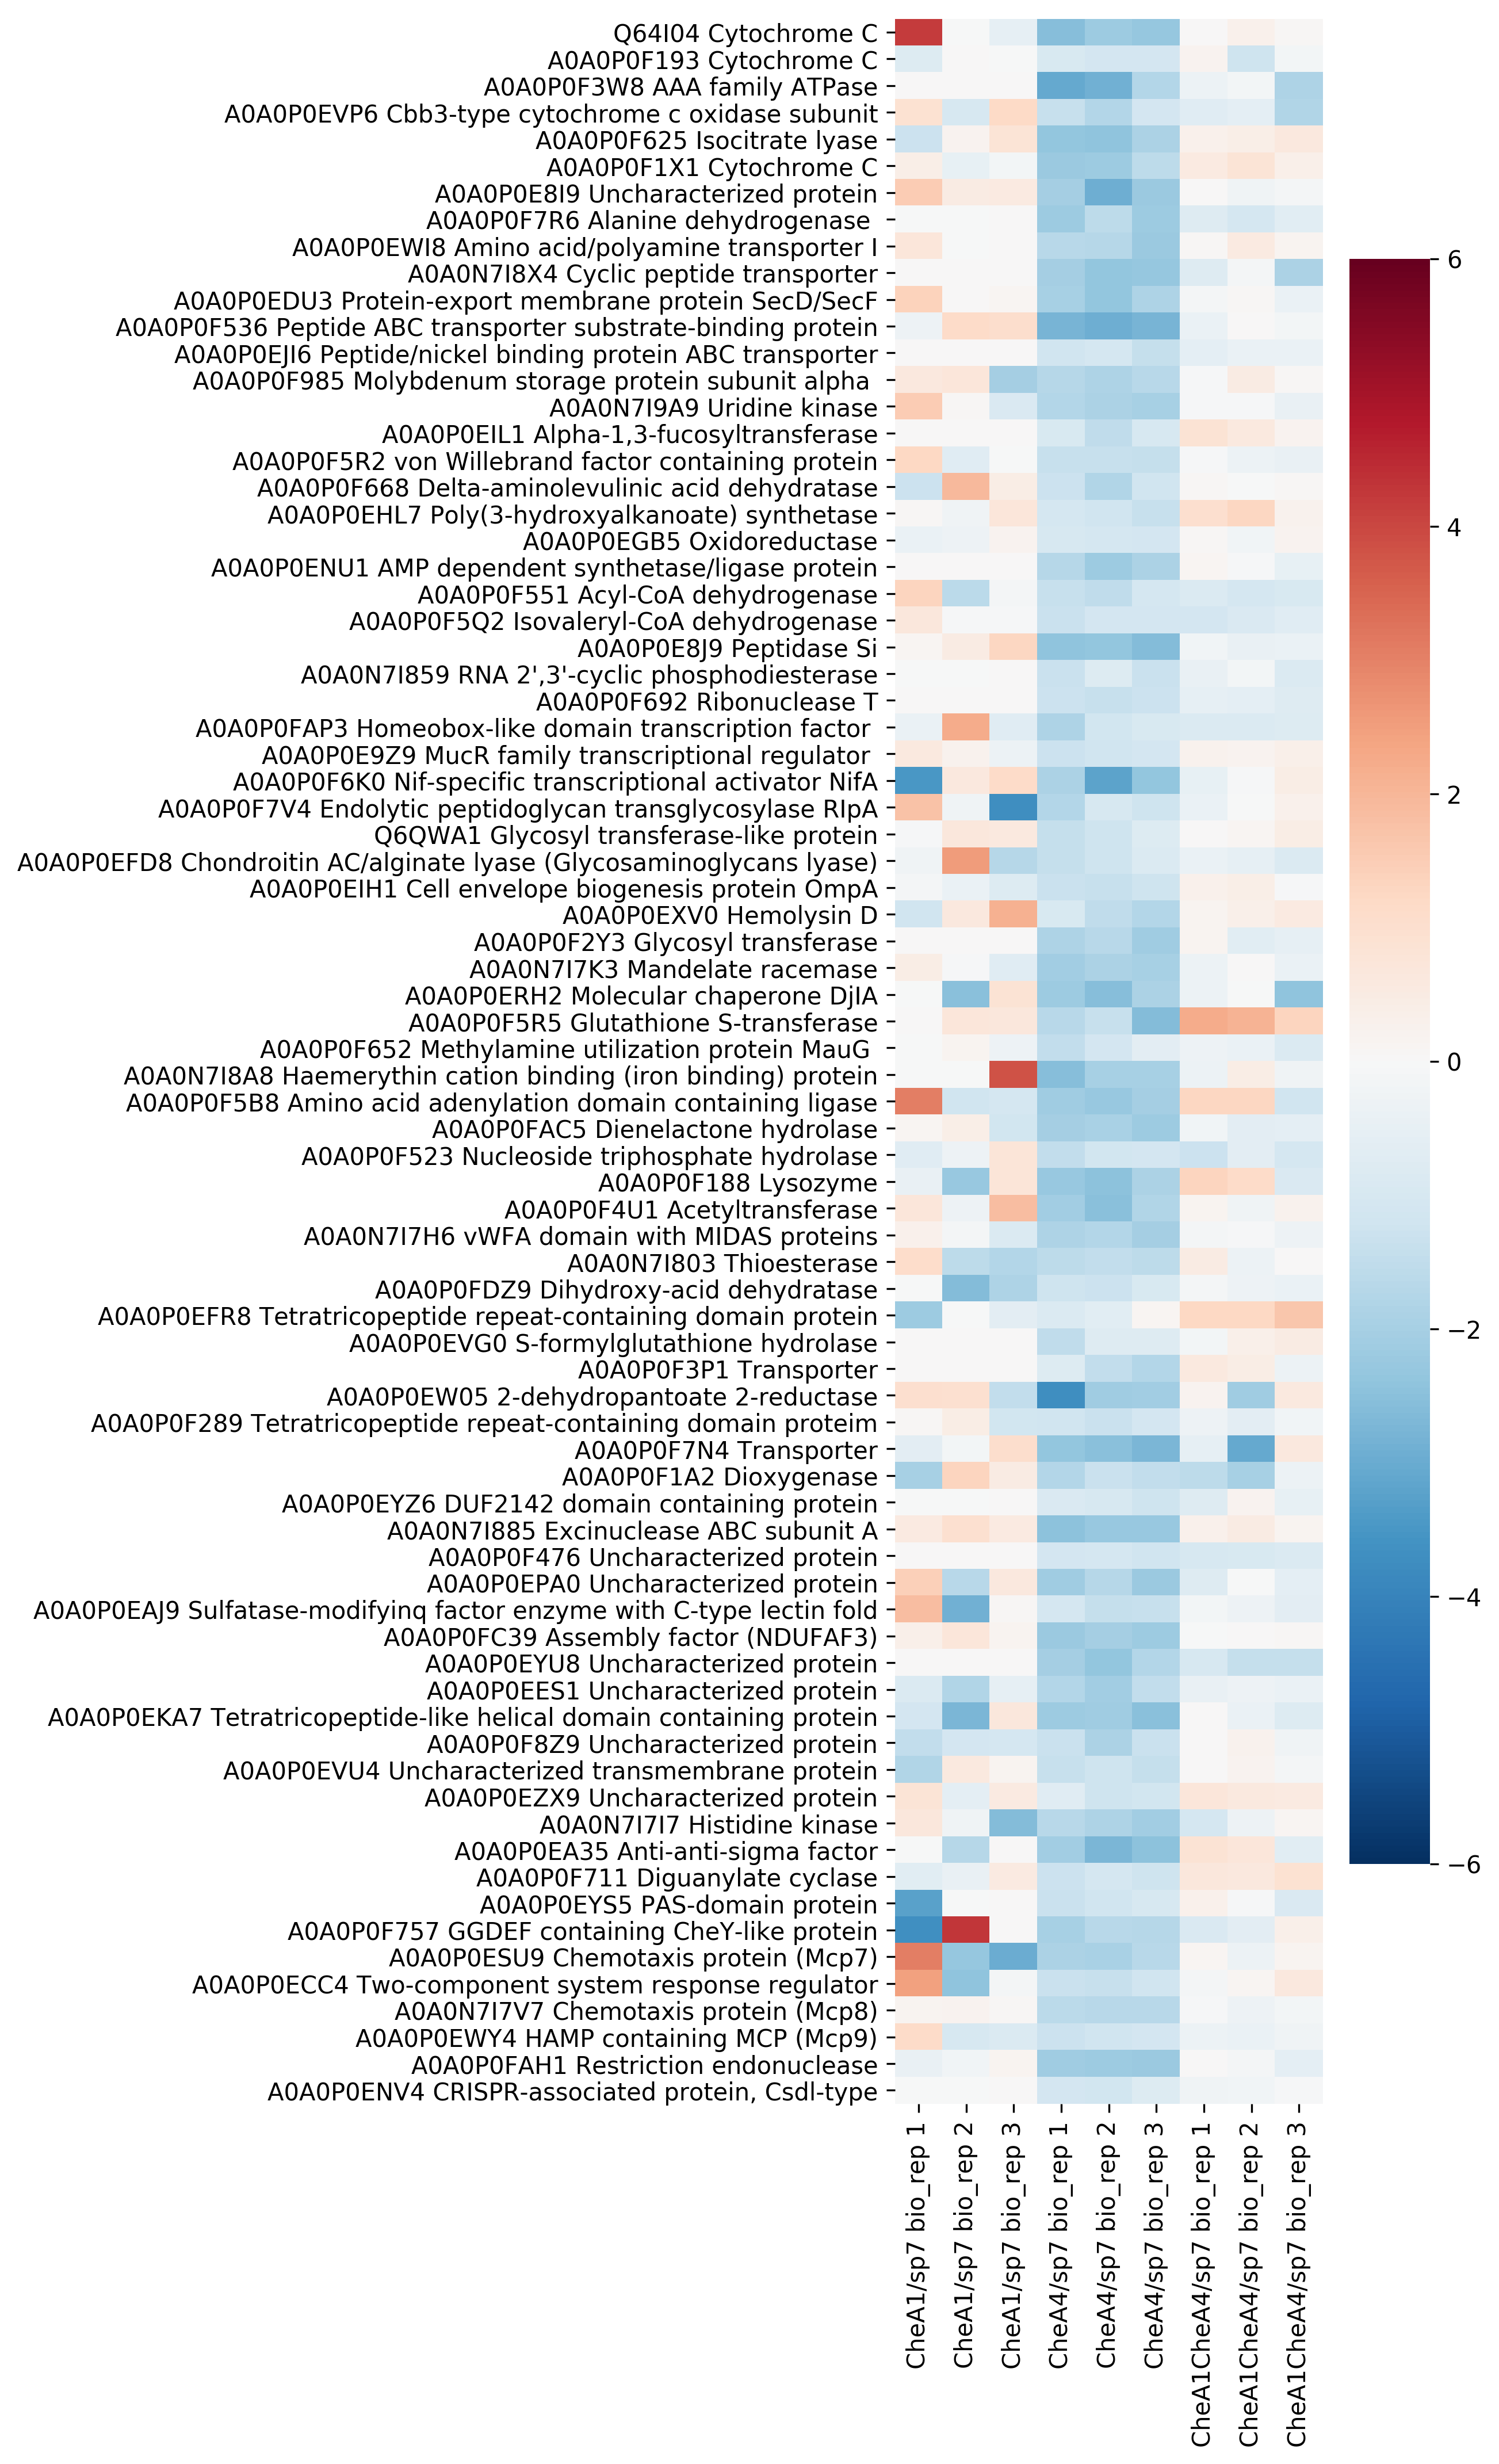

In [19]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==6].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,16))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [20]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==6].sort_values('COG_heatmap')
for i in hi['COG_heatmap']:
    print(i)

C
C
C
C
C
C
D
E
E
E
E
E
E
F
F
G
H
H
I
I
I
I
I
J
J
J
K
K
K
M
M
M
M
M
M
M
O
O
P
P
Q
Q
R
R
R
R
R
R
R
R
R
R
R
R
R
S
S
S
S
S
S
S
S
S
S
S
S
T
T
T
T
T
T
T
T
T
V
V


Text(62.16666666666657, 0.5, '')

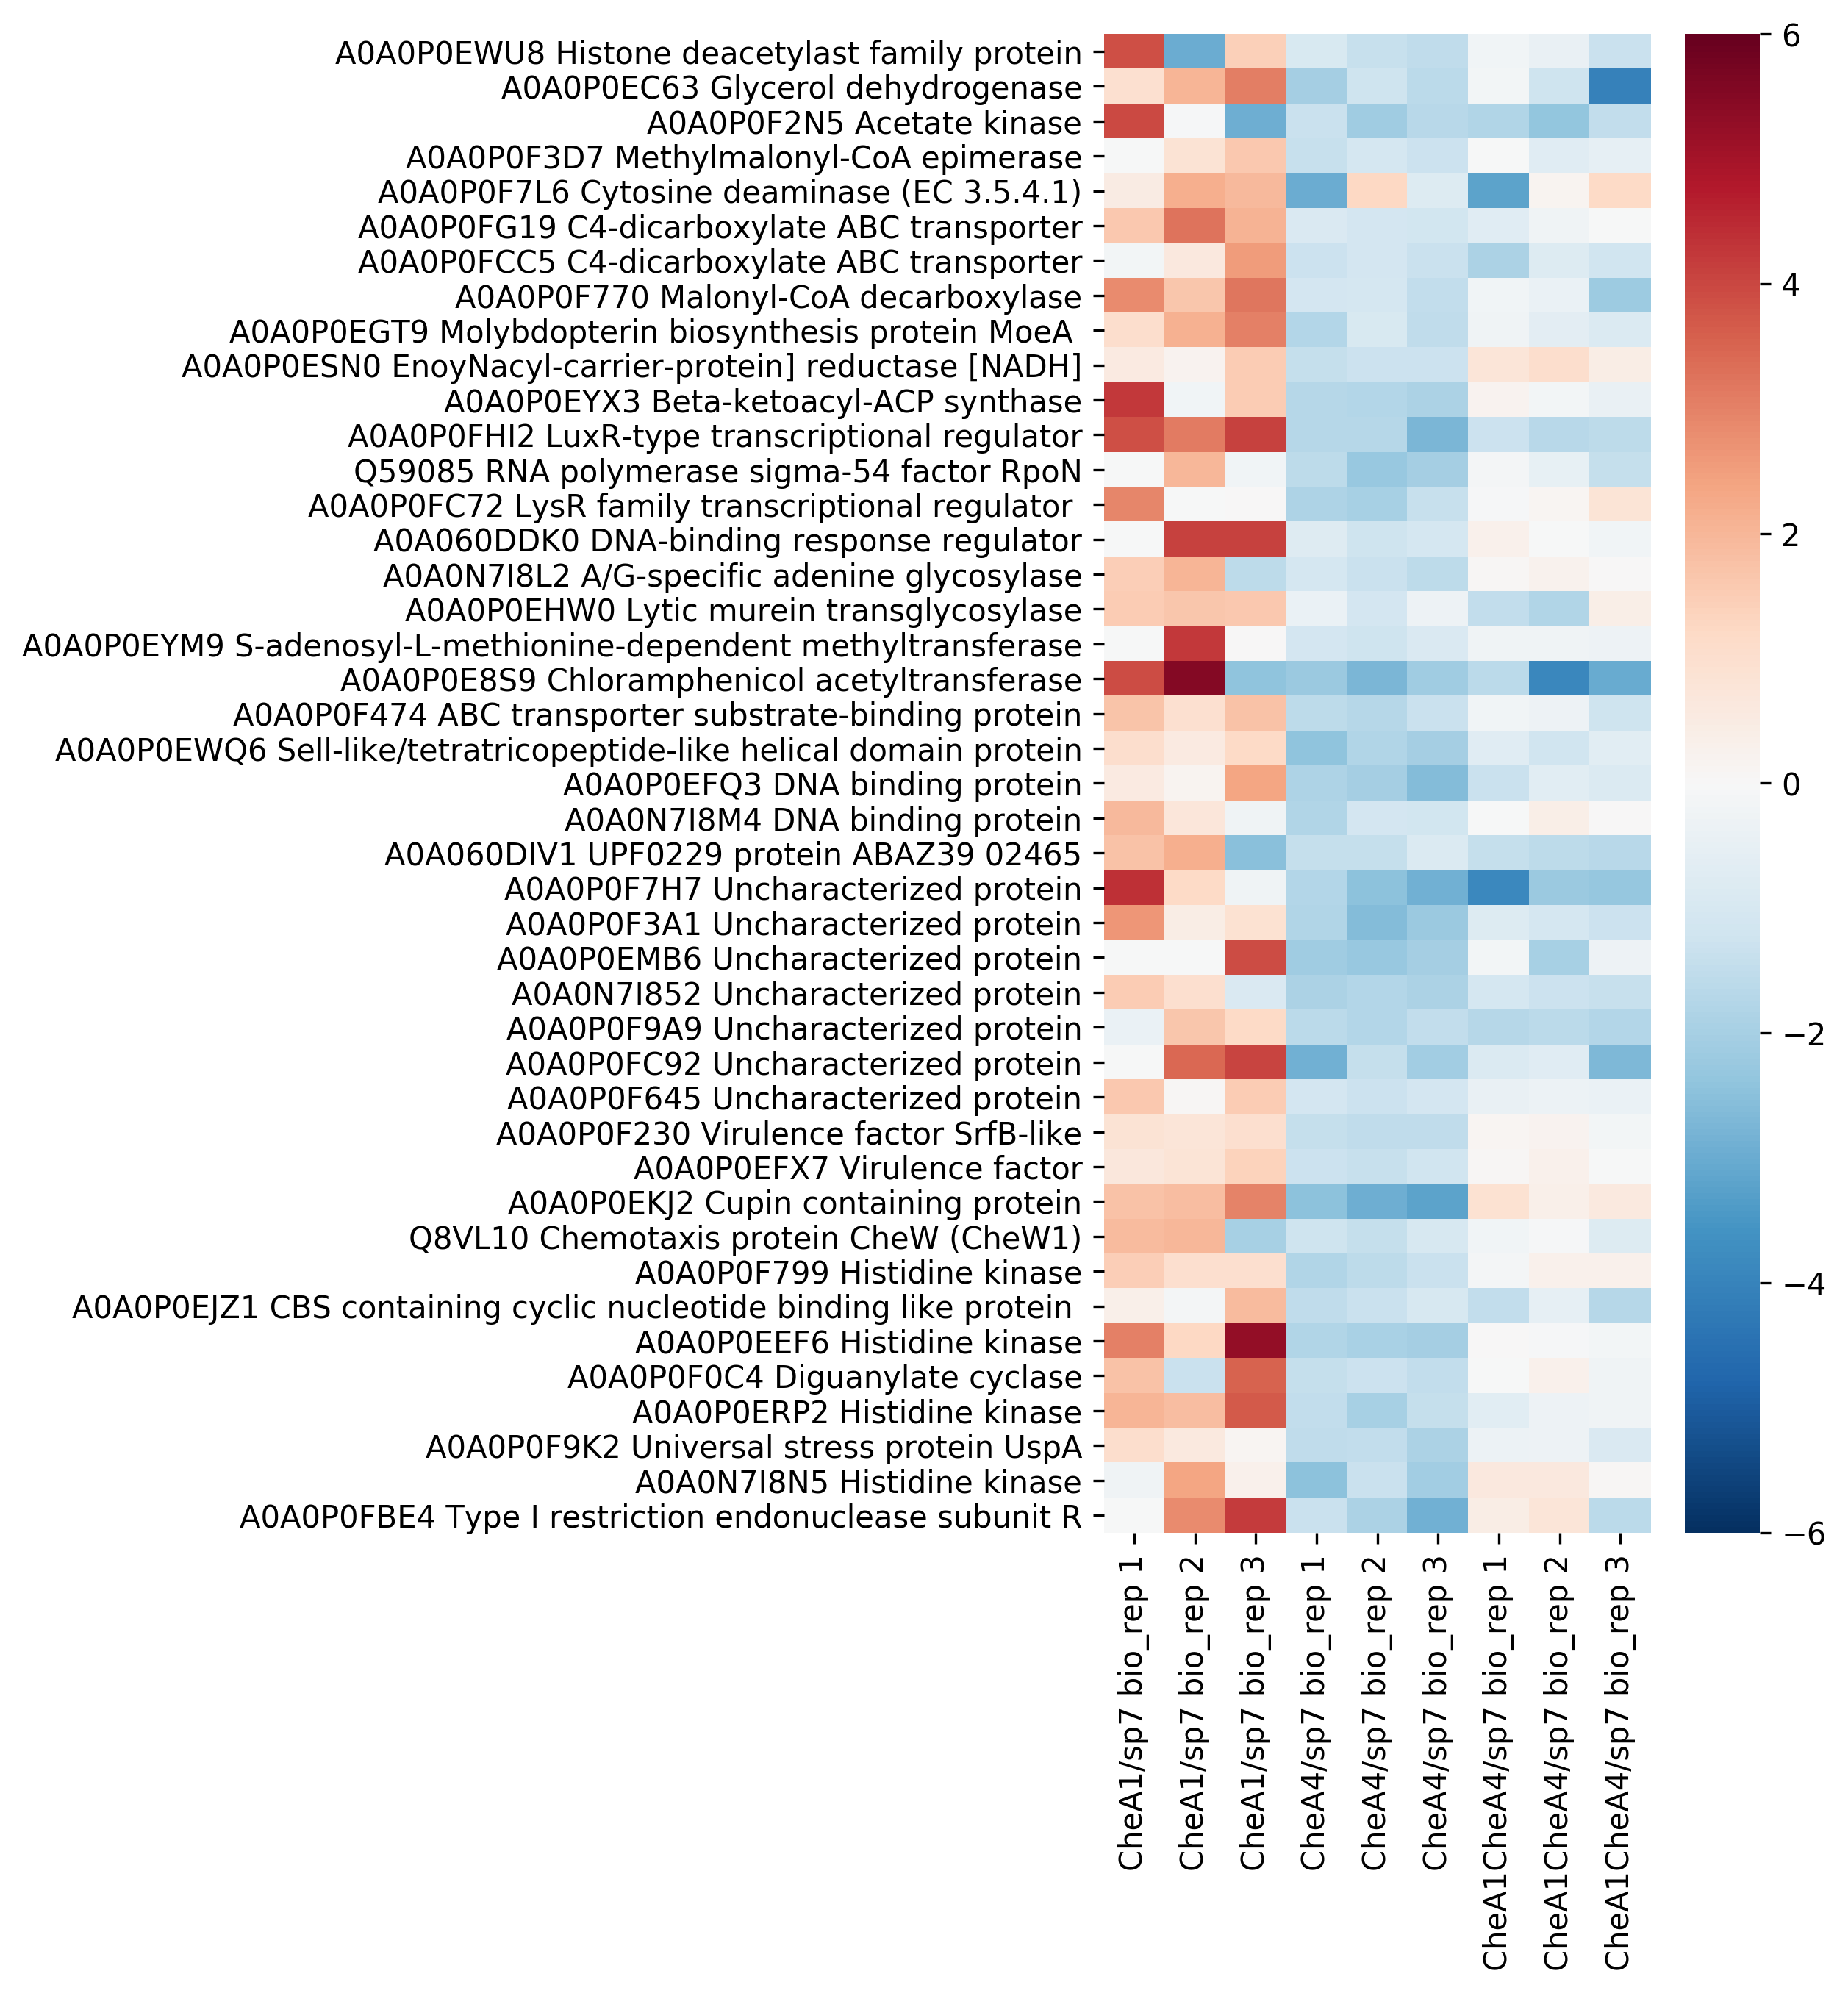

In [21]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==7].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,9))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [22]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==7].sort_values('COG_heatmap')
hi

level_0                                              index    A1/sp7  \
212       26      A0A0P0EWU8 Histone deacetylast family protein  0.777930   
234       31                  A0A0P0EC63 Glycerol dehydrogenase  2.017865   
200      196                          A0A0P0F2N5 Acetate kinase  0.321344   
214      212             A0A0P0F3D7 Methylmalonyl-CoA epimerase  0.815294   
218       13         A0A0P0F7L6 Cytosine deaminase (EC 3.5.4.1)  1.542605   
226      143        A0A0P0FG19 C4-dicarboxylate ABC transporter  2.330556   
198      140        A0A0P0FCC5 C4-dicarboxylate ABC transporter  1.000658   
224      308               A0A0P0F770 Malonyl-CoA decarboxylase  2.570789   
225       51  A0A0P0EGT9 Molybdopterin biosynthesis protein ...  2.076943   
209      218  A0A0P0ESN0 EnoyNacyl-carrier-protein] reductas...  0.768732   
228      311              A0A0P0EYX3 Beta-ketoacyl-ACP synthase  1.849160   
233       83     A0A0P0FHI2 LuxR-type transcriptional regulator  3.706073   
216       95         Q59085 RNA polymerase sigma-54 factor RpoN  0.594198   
210       85  A0A0P0FC72 LysR family transcriptional regulator   0.982713   
223       82          A0A060DDK0 DNA-binding response regulator  2.728173   
205       17        A0A0N7I8L2 A/G-specific adenine glycosylase  0.646698   
217        1           A0A0P0EHW0 Lytic murein transglycosylase  1.603657   
220      245  A0A0P0EYM9 S-adenosyl-L-methionine-dependent m...  1.418287   
231       69       A0A0P0E8S9 Chloramphenicol acetyltransferase  2.336054   
219      141  A0A0P0F474 ABC transporter substrate-binding p...  1.467803   
193       28  A0A0P0EWQ6 Sell-like/tetratricopeptide-like he...  0.934533   
194       97                     A0A0P0EFQ3 DNA binding protein  1.024622   
206       98                     A0A0N7I8M4 DNA binding protein  0.803045   
201      230            A0A060DIV1 UPF0229 protein ABAZ39 02465  0.474156   
232      269                 A0A0P0F7H7 Uncharacterized protein  1.765347   
195      284                 A0A0P0F3A1 Uncharacterized protein  1.342421   
196      289                 A0A0P0EMB6 Uncharacterized protein  1.311469   
199      283                 A0A0N7I852 Uncharacterized protein  0.552214   
202      273                 A0A0P0F9A9 Uncharacterized protein  0.815350   
235      288                 A0A0P0FC92 Uncharacterized protein  2.505245   
221      286                 A0A0P0F645 Uncharacterized protein  1.070486   
207       75              A0A0P0F230 Virulence factor SrfB-like  0.877428   
208       76                        A0A0P0EFX7 Virulence factor  0.956855   
222      236                A0A0P0EKJ2 Cupin containing protein  2.203482   
213      177             Q8VL10 Chemotaxis protein CheW (CheW1)  0.632135   
203      185                        A0A0P0F799 Histidine kinase  1.168397   
197       55  A0A0P0EJZ1 CBS containing cyclic nucleotide bi...  0.696723   
227      183                        A0A0P0EEF6 Histidine kinase  3.172794   
204      301                     A0A0P0F0C4 Diguanylate cyclase  1.331898   
230      303                        A0A0P0ERP2 Histidine kinase  2.510799   
215       74           A0A0P0F9K2 Universal stress protein UspA  0.588036   
211      186                        A0A0N7I8N5 Histidine kinase  0.806540   
229       14  A0A0P0FBE4 Type I restriction endonuclease sub...  2.340883   

       A4/sp7  A1A4/sp7  cluster COG_heatmap  
212 -1.300090 -0.677894        7           B  
234 -1.624636 -1.814580        7           C  
200 -1.705891 -1.884105        7           C  
214 -1.240459 -0.436560        7           E  
218 -0.856678 -0.623945        7           F  
226 -1.068208 -0.348389        7           G  
198 -1.240805 -1.301797        7           G  
224 -1.213591 -0.933116        7           G  
225 -1.407331 -0.594798        7           H  
209 -1.333965  0.760844        7           I  
228 -1.794380 -0.141670        7           I  
233 -2.047060 -1.516332        7           K  
216 -

Text(62.16666666666657, 0.5, '')

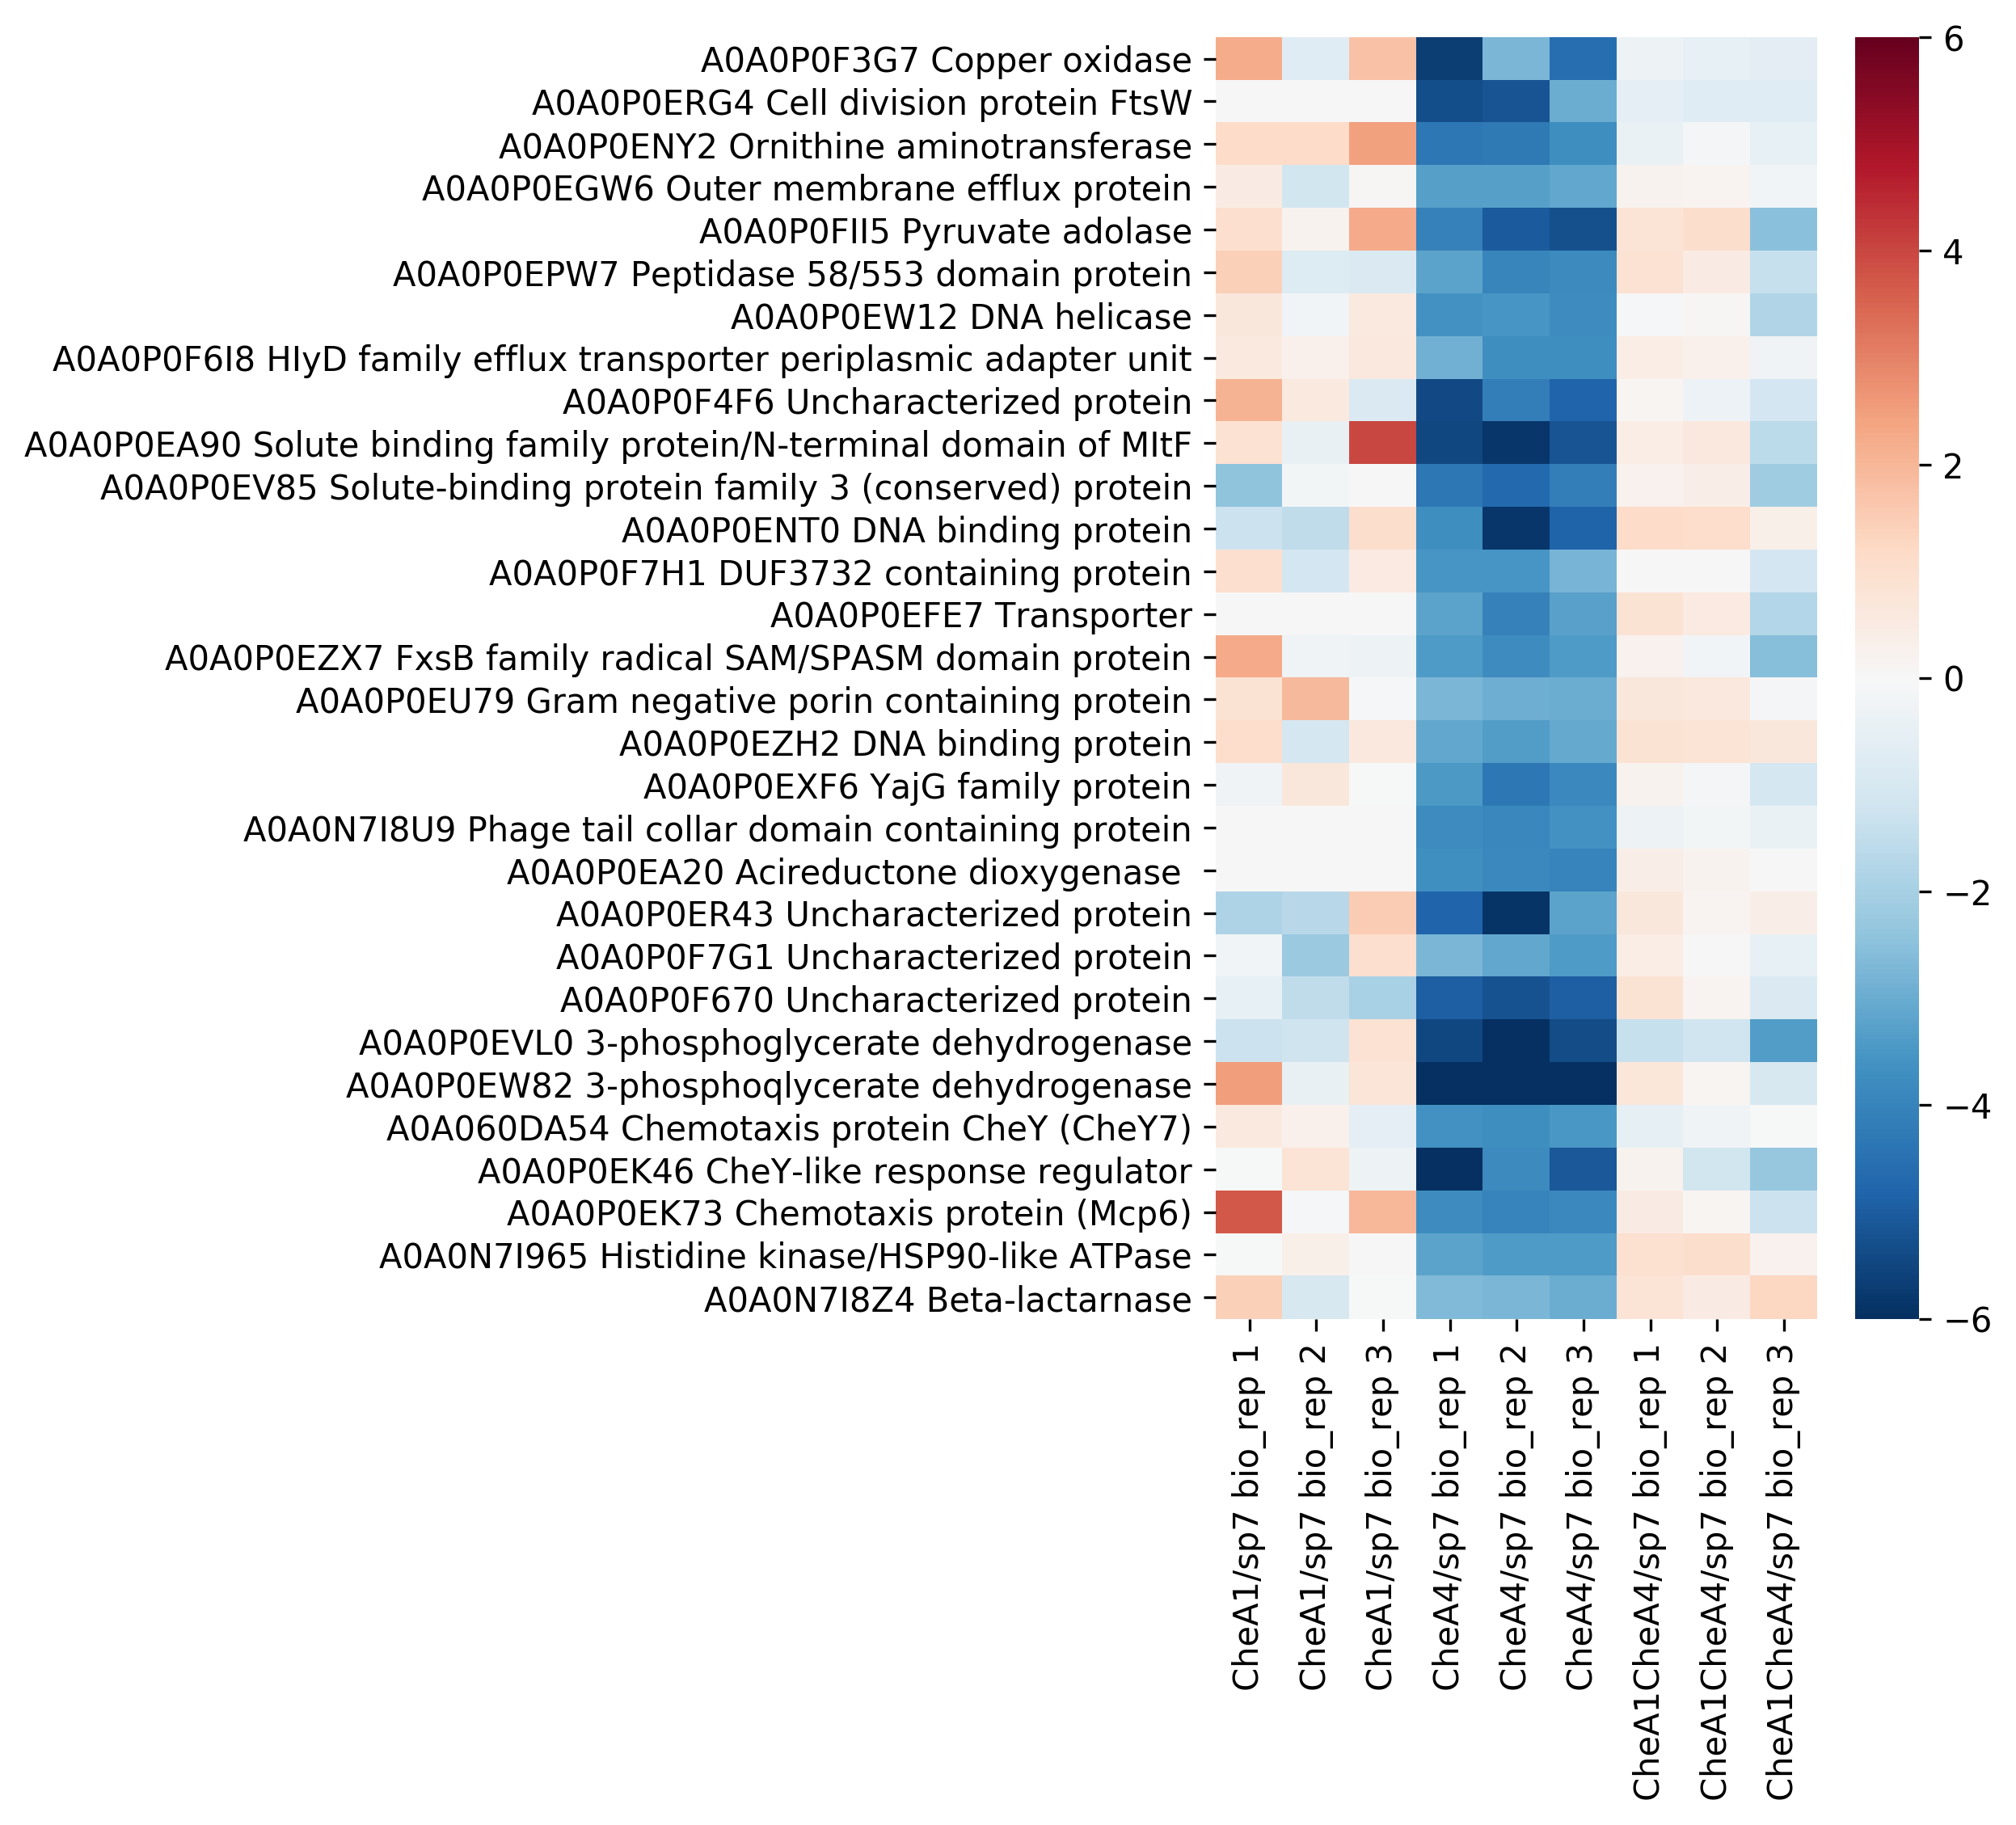

In [23]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==8].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,7))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [24]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==8].sort_values('COG_heatmap')
hi

level_0                                              index    A1/sp7  \
265      244                          A0A0P0F3G7 Copper oxidase  1.098116   
257        4              A0A0P0ERG4 Cell division protein FtsW  0.000000   
260       59              A0A0P0ENY2 Ornithine aminotransferase  1.590472   
243      150           A0A0P0EGW6 Outer membrane efflux protein -0.198181   
264      208                        A0A0P0FII5 Pyruvate adolase  1.168957   
246      253         A0A0P0EPW7 Peptidase 58/553 domain protein -0.088280   
241      241                            A0A0P0EW12 DNA helicase  0.365806   
240      156  A0A0P0F6I8 HIyD family efflux transporter peri...  0.511630   
263      161                 A0A0P0F4F6 Uncharacterized protein  0.613348   
262      260  A0A0P0EA90 Solute binding family protein/N-ter...  1.487882   
254      259  A0A0P0EV85 Solute-binding protein family 3 (co... -0.849066   
252      100                     A0A0P0ENT0 DNA binding protein -0.580012   
249      154              A0A0P0F7H1 DUF3732 containing protein  0.154030   
250      151                             A0A0P0EFE7 Transporter  0.000000   
242      246  A0A0P0EZX7 FxsB family radical SAM/SPASM domai...  0.574616   
239      152  A0A0P0EU79 Gram negative porin containing protein  0.905710   
237       99                     A0A0P0EZH2 DNA binding protein  0.229122   
248      316                     A0A0P0EXF6 YajG family protein  0.126465   
247       81  A0A0N7I8U9 Phage tail collar domain containing...  0.000000   
245       58               A0A0P0EA20 Acireductone dioxygenase   0.000000   
253      290                 A0A0P0ER43 Uncharacterized protein -0.654500   
244      287                 A0A0P0F7G1 Uncharacterized protein -0.486712   
255      291                 A0A0P0F670 Uncharacterized protein -1.336722   
256      192        A0A0P0EVL0 3-phosphoglycerate dehydrogenase -0.532317   
259      193        A0A0P0EW82 3-phosphoqlycerate dehydrogenase  0.950608   
251      175         A0A060DA54 Chemotaxis protein CheY (CheY7)  0.094616   
258      190            A0A0P0EK46 CheY-like response regulator  0.166757   
261      168               A0A0P0EK73 Chemotaxis protein (Mcp6)  1.883801   
238      305      A0A0N7I965 Histidine kinase/HSP90-like ATPase  0.120463   
236        2                         A0A0N7I8Z4 Beta-lactarnase  0.124385   

       A4/sp7  A1A4/sp7  cluster COG_heatmap  
265 -4.327272 -0.457972        8           C  
257 -4.480847 -0.672876        8           D  
260 -4.114453 -0.342301        8           E  
243 -3.232106  0.057011        8           E  
264 -4.782816 -0.200893        8           H  
246 -3.673265  0.000447        8           J  
241 -3.647682 -0.608601        8           L  
240 -3.439266  0.171855        8           M  
263 -4.780916 -0.452619        8           R  
262 -5.495765 -0.170617        8           R  
254 -4.396747 -0.496107        8           R  
252 -4.802089  0.857620        8           R  
249 -3.295271 -0.363747        8           R  
250 -3.507157 -0.116336        8           R  
242 -3.536239 -0.830111        8           R  
239 -2.888774  0.406289        8           R  
237 -3.179283  0.791384        8           R  
248 -3.884370 -0.322689        8           R  
247 -3.777514 -0.298762        8           S  
245 -3.848219  0.217156        8           S  
253 -4.641972  0.406517        8           S  
244 -3.092564 -0.010020        8           S  
255 -5.050603  0.068880        8           S  
256 -5.600676 -1.974890        8           S  
259 -7.486100 -0.056563        8           S  
251 -3.618552 -0.271547        8           T  
258 -5.071035 -1.083881        8           T  
261 -3.875135 -0.230265        8           T  
238 -3.342188  0.764220        8           T  
236 -2.804530  0.871762        8           V

Text(62.16666666666657, 0.5, '')

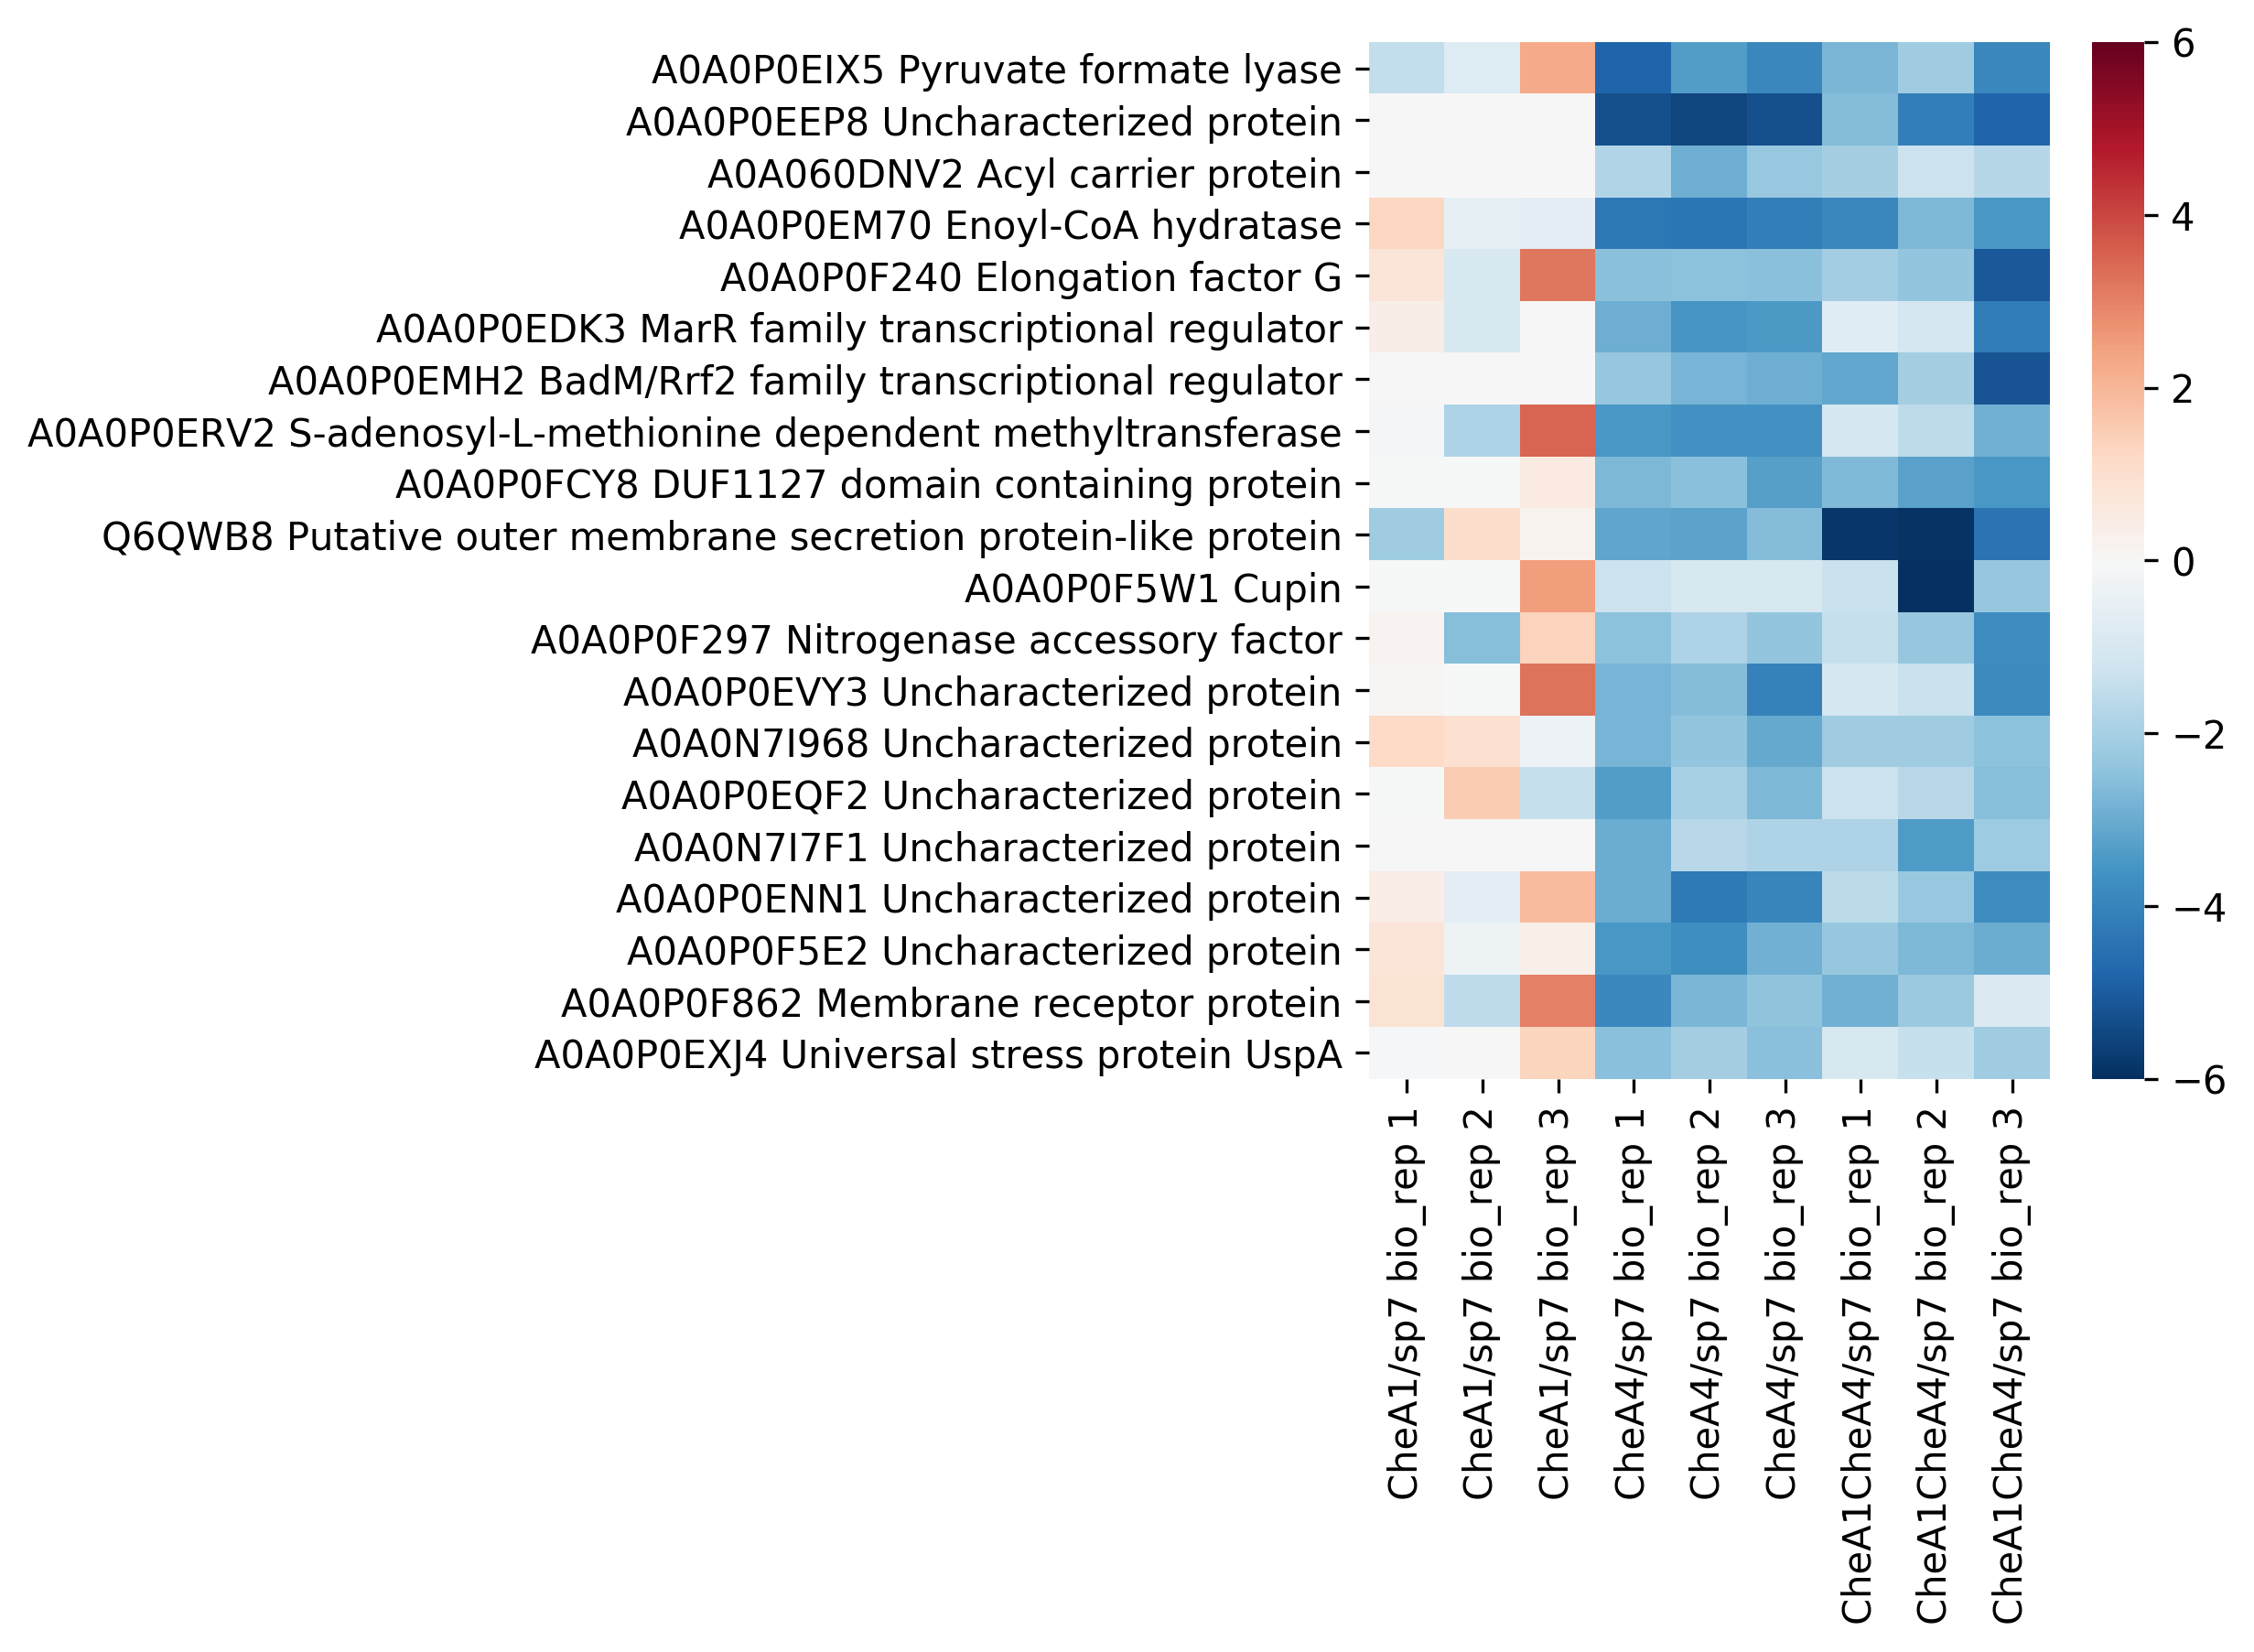

In [25]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==9].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,5))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)],cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [26]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==9].sort_values('COG_heatmap')
hi

level_0                                              index    A1/sp7  \
279      207                  A0A0P0EIX5 Pyruvate formate lyase -0.001839   
278      157                 A0A0P0EEP8 Uncharacterized protein  0.000000   
270      309                    A0A060DNV2 Acyl carrier protein  0.000000   
280      215                     A0A0P0EM70 Enoyl-CoA hydratase  0.057792   
283      252                     A0A0P0F240 Elongation factor G  0.992284   
277       88   A0A0P0EDK3 MarR family transcriptional regulator -0.213080   
284       87  A0A0P0EMH2 BadM/Rrf2 family transcriptional re...  0.000000   
276       67  A0A0P0ERV2 S-adenosyl-L-methionine dependent m...  0.524323   
285      312       A0A0P0FCY8 DUF1127 domain containing protein  0.174985   
281      114  Q6QWB8 Putative outer membrane secretion prote... -0.300598   
282      229                                   A0A0P0F5W1 Cupin  0.837308   
266       43            A0A0P0F297 Nitrogenase accessory factor -0.325293   
273      272                 A0A0P0EVY3 Uncharacterized protein  1.110140   
271      158                 A0A0N7I968 Uncharacterized protein  0.600532   
269      274                 A0A0P0EQF2 Uncharacterized protein  0.041518   
267      276                 A0A0N7I7F1 Uncharacterized protein  0.000000   
274      271                 A0A0P0ENN1 Uncharacterized protein  0.568402   
275      275                 A0A0P0F5E2 Uncharacterized protein  0.277606   
272      261               A0A0P0F862 Membrane receptor protein  0.768135   
268       71           A0A0P0EXJ4 Universal stress protein UspA  0.424099   

       A4/sp7  A1A4/sp7  cluster COG_heatmap  
279 -4.007518 -2.920715        9           C  
278 -5.344988 -3.860789        9           F  
270 -2.328756 -1.670782        9           G  
280 -4.293883 -3.367817        9           I  
283 -2.489604 -3.169538        9           J  
277 -3.303020 -1.989600        9           K  
284 -2.677084 -3.455757        9           K  
276 -3.585123 -1.829410        9           Q  
285 -2.847819 -3.130173        9           R  
281 -2.987092 -5.403643        9           R  
282 -1.109033 -4.009819        9           S  
266 -2.215964 -2.523631        9           S  
273 -3.145476 -2.062591        9           S  
271 -2.749451 -2.239314        9           S  
269 -2.678963 -1.851374        9           S  
267 -2.168214 -2.470375        9           S  
274 -3.757408 -2.563966        9           S  
275 -3.370545 -2.660533        9           S  
272 -3.003619 -2.009097        9           T  
268 -2.348366 -1.513406        9           V

Text(62.16666666666656, 0.5, '')

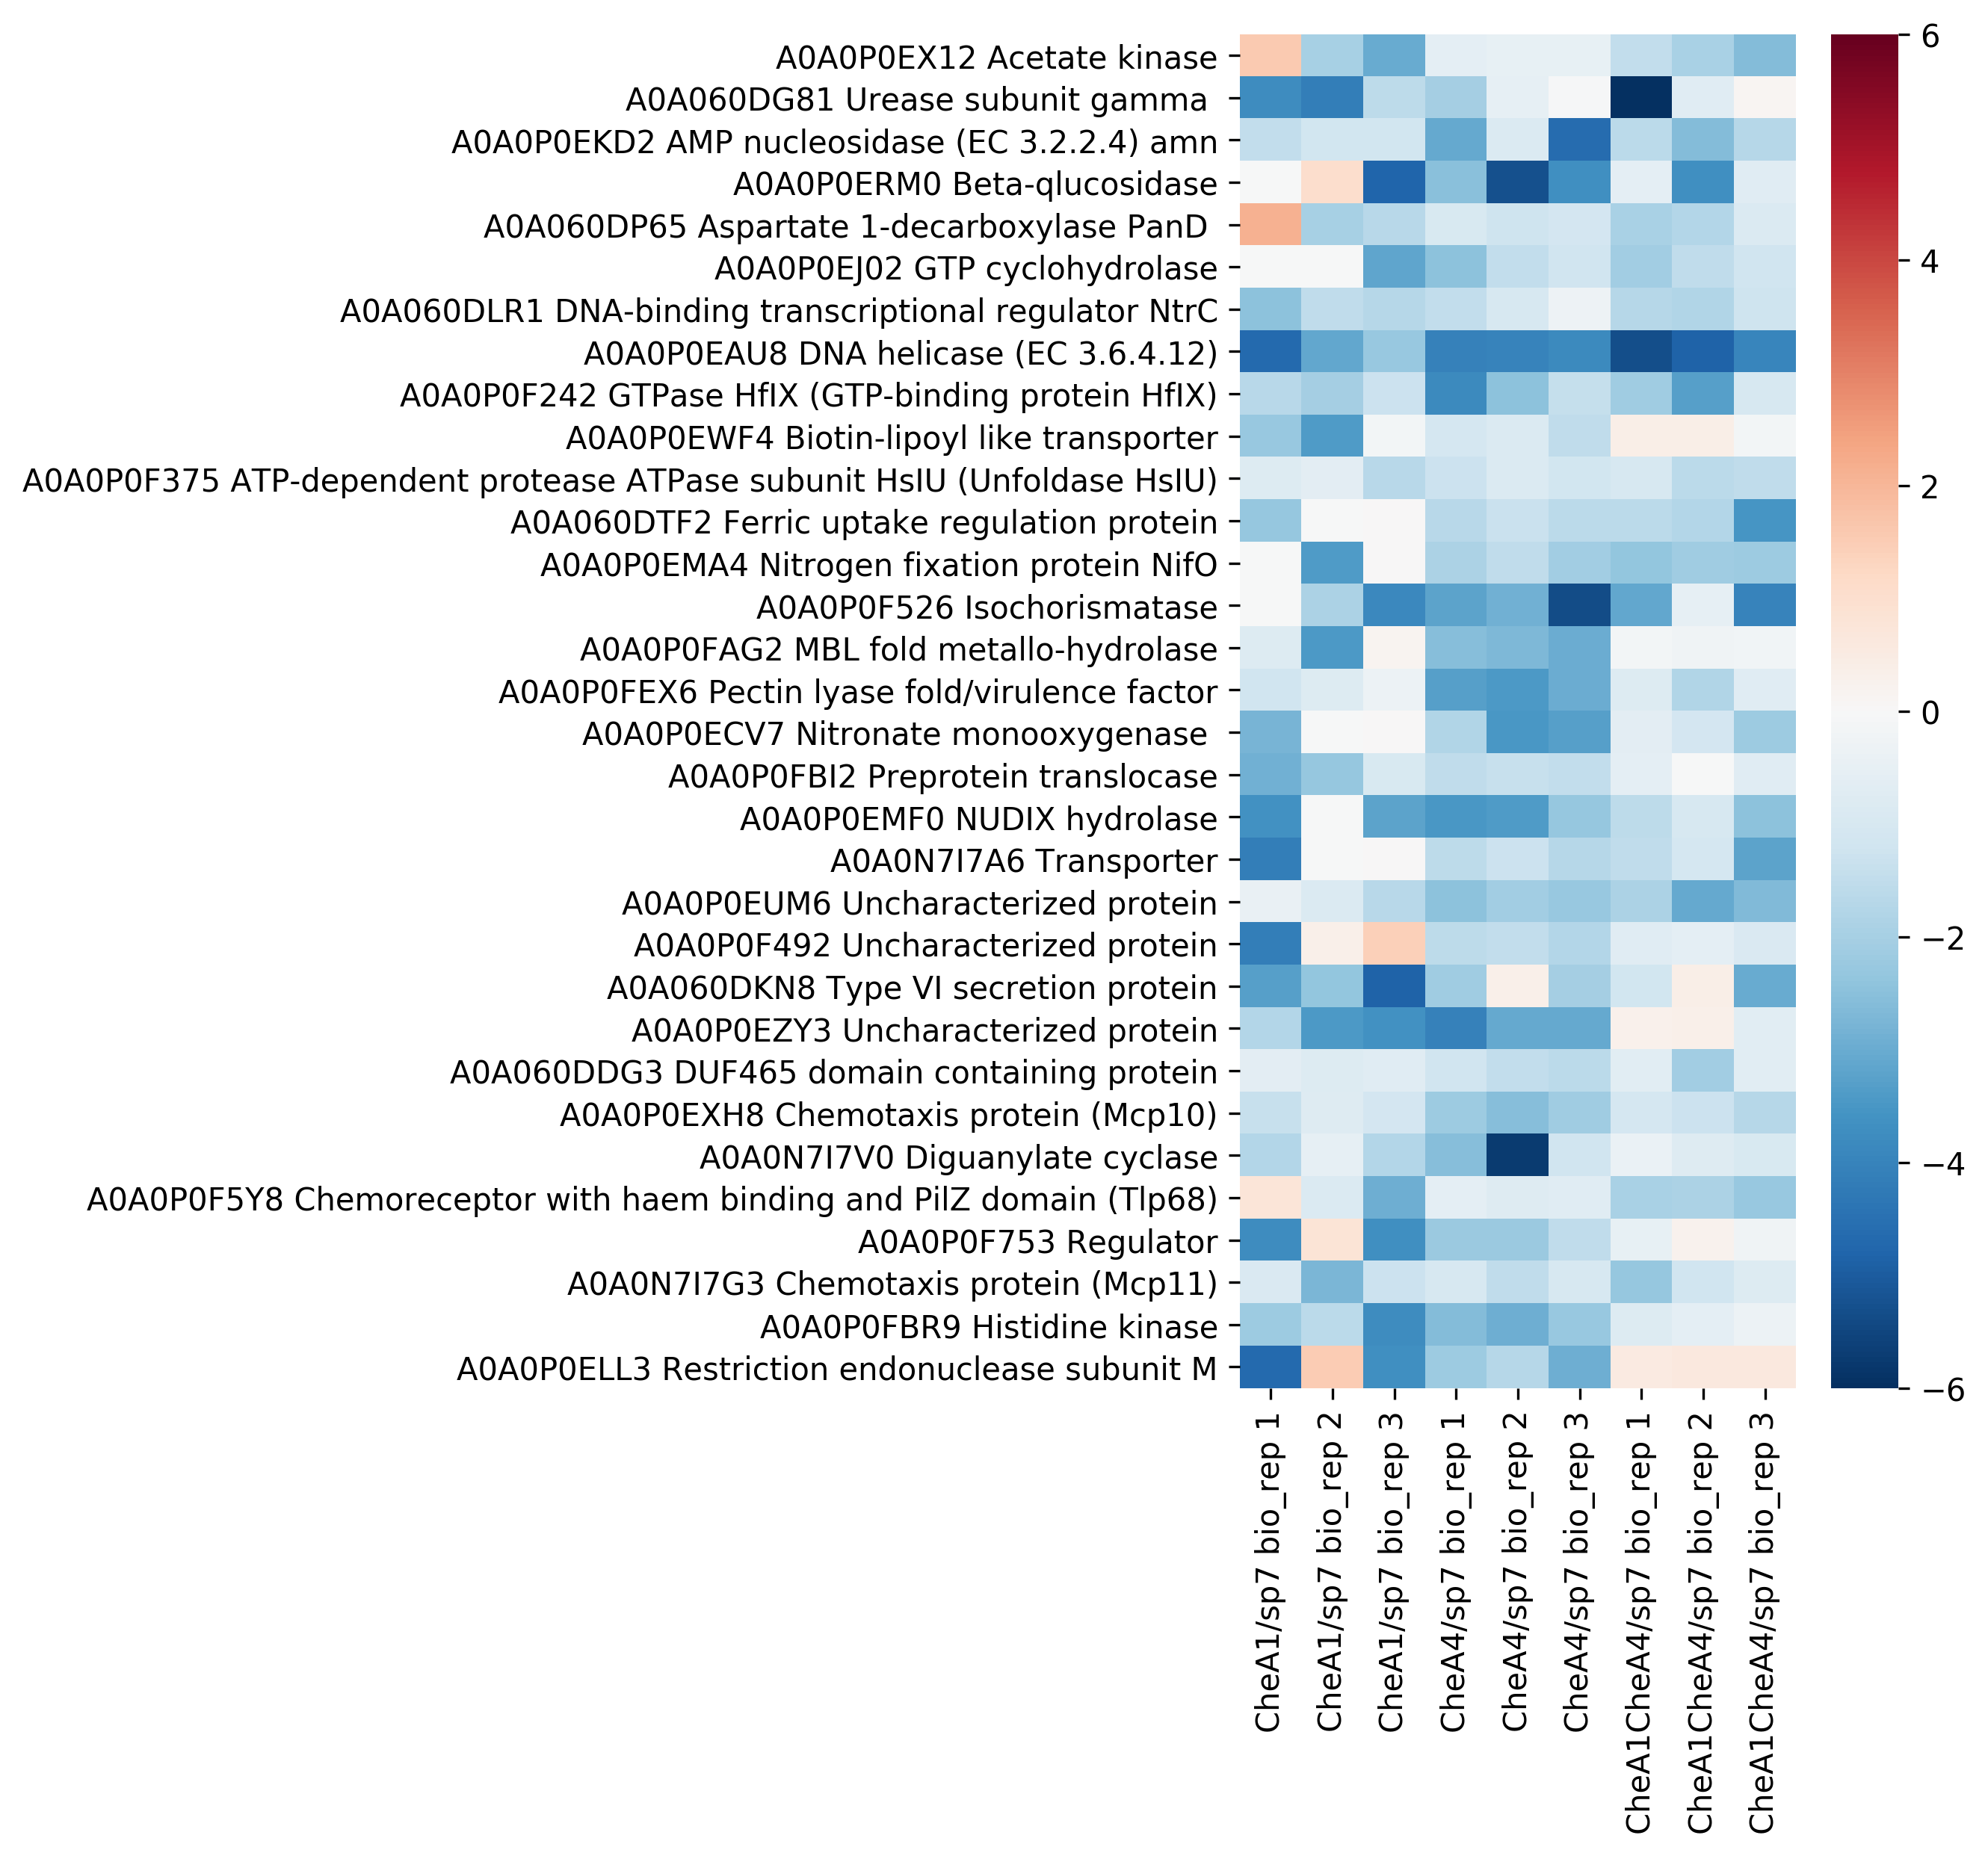

In [27]:
heatmap_df = heatmap_df_reordered[heatmap_df_reordered['cluster']==10].sort_values('COG_heatmap')
heatmap_df = heatmap_df[['index','A1/sp7','A4/sp7','A1A4/sp7']].set_index('index', drop=True).rename_axis(None)
fig, ax = plt.subplots(figsize=(4,8))
g = sns.heatmap(df_heatmap.loc[list(heatmap_df.index)].drop_duplicates(),cmap='RdBu_r', vmin=-6, vmax=6, ax=ax)

ax.set_ylabel('')

In [28]:
hi = heatmap_df_reordered[heatmap_df_reordered['cluster']==10].sort_values('COG_heatmap')
hi

level_0                                              index    A1/sp7  \
312      195                          A0A0P0EX12 Acetate kinase -1.150806   
316       49                   A0A060DG81 Urease subunit gamma  -3.162226   
299       15       A0A0P0EKD2 AMP nucleosidase (EC 3.2.2.4) amn -1.271366   
297      206                        A0A0P0ERM0 Beta-qlucosidase -1.242767   
309       53         A0A060DP65 Aspartate 1-decarboxylase PanD  -0.504030   
306      167                      A0A0P0EJ02 GTP cyclohydrolase -1.055293   
313      101  A0A060DLR1 DNA-binding transcriptional regulat... -1.899552   
315      239              A0A0P0EAU8 DNA helicase (EC 3.6.4.12) -3.343474   
300      240  A0A0P0F242 GTPase HfIX (GTP-binding protein HfIX) -1.658508   
289      138          A0A0P0EWF4 Biotin-lipoyl like transporter -1.938081   
310      111  A0A0P0F375 ATP-dependent protease ATPase subun... -1.043394   
303       89        A0A060DTF2 Ferric uptake regulation protein -0.773774   
302       44          A0A0P0EMA4 Nitrogen fixation protein NifO -1.127544   
296      205                         A0A0P0F526 Isochorismatase -1.917009   
294       16              A0A0P0FAG2 MBL fold metallo-hydrolase -1.363651   
293      247      A0A0P0FEX6 Pectin lyase fold/virulence factor -0.790158   
292       50                A0A0P0ECV7 Nitronate monooxygenase  -0.923534   
290      139                  A0A0P0FBI2 Preprotein translocase -2.050169   
298      317                         A0A0P0EMF0 NUDIX hydrolase -2.281589   
305      137                             A0A0N7I7A6 Transporter -1.389673   
301      277                 A0A0P0EUM6 Uncharacterized protein -0.993671   
308      270                 A0A0P0F492 Uncharacterized protein -0.773593   
317       70               A0A060DKN8 Type VI secretion protein -3.523546   
287      292                 A0A0P0EZY3 Uncharacterized protein -2.941803   
307      231        A0A060DDG3 DUF465 domain containing protein -0.725902   
304      173              A0A0P0EXH8 Chemotaxis protein (Mcp10) -1.078561   
295      179                     A0A0N7I7V0 Diguanylate cyclase -1.358718   
311      171  A0A0P0F5Y8 Chemoreceptor with haem binding and... -1.010400   
291      189                               A0A0P0F753 Regulator -2.206415   
314      172              A0A0N7I7G3 Chemotaxis protein (Mcp11) -1.644931   
286      184                        A0A0P0FBR9 Histidine kinase -2.534122   
288        6      A0A0P0ELL3 Restriction endonuclease subunit M -2.265938   

       A4/sp7  A1A4/sp7  cluster COG_heatmap  
312 -0.517839 -2.011423       10           C  
316 -0.881633 -3.232999       10           E  
299 -2.852618 -1.977051       10           F  
297 -3.820380 -1.672427       10           G  
309 -1.105816 -1.520912       10           H  
306 -1.711806 -1.609870       10           H  
313 -0.924584 -1.583684       10           K  
315 -3.963511 -4.712711       10           L  
300 -2.560150 -2.154883       10           L  
289 -1.149022  0.216378       10           M  
310 -1.097016 -1.368816       10           O  
303 -1.545884 -2.295088       10           P  
302 -1.840839 -2.226752       10           P  
296 -3.813964 -2.555402       10           Q  
294 -2.744539 -0.217197       10           R  
293 -3.241265 -1.113936       10           R  
292 -2.865519 -1.299533       10           R  
290 -1.468201 -0.440428       10           R  
298 -3.072524 -1.675335       10           R  
305 -1.521167 -1.909532       10           R  
301 -2.269145 -2.529048       10           S  
308 -1.598673 -0.747122       10           S  
317 -1.276885 -1.272518       10           S  
287 -3.399336  0.002457       10           S  
307 -1.430167 -1.142630       10           S  
304 -2.291465 -1.351632       10           T  
295 -3.168285 -0.723052       10           T  
311 -0.697091 -2.048216       10           T  
291 -1.976496 -0.172272       10           T  
314 -1.182061 -1.455461       10           T  
286 -2

In [33]:
heatmap_df = data_frame
reordered_index = g.dendrogram_row.reordered_ind
heatmap_df = heatmap_df.reset_index()
heatmap_df_reordered = heatmap_df.loc[reordered_index].reset_index()
heatmap_df_reordered['cluster'] = clusters[reordered_index] 
df_annotation =df['COG_ID']
heatmap_df_reordered['COG_ID'] =list(df_annotation[reordered_index])
heatmap_df_reordered[heatmap_df_reordered['cluster'] == 1]['COG_ID']

0     IM
1      C
2      P
3     NT
4      Q
5      T
6      I
7      C
8      S
9      K
10     R
11    ET
Name: COG_ID, dtype: object

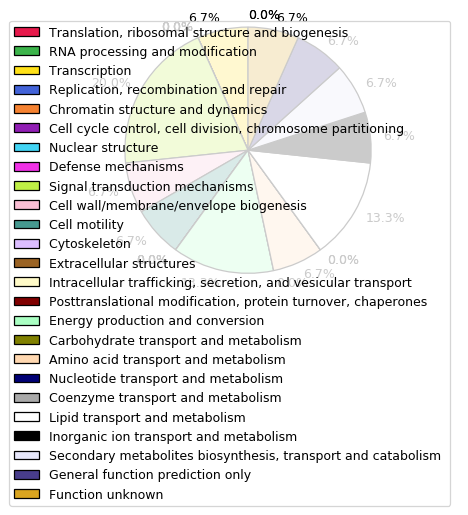

In [35]:
#pie chart for cluister 1 COG term distribution
from collections import Counter
cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 1]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster1_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 2 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 2]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster2_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 3 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 3]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster3_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 4 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 4]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster4_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 5 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 5]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster5_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 6 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 6]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster6_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 7 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 7]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster7_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 8 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 8]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster8_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 9 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 9]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster9_COGterms.svg", dpi=300)

In [ ]:
#pie chart for cluister 10 COG term distribution

cnt = Counter()
for words in heatmap_df_reordered[heatmap_df_reordered['cluster'] == 10]['COG_ID']:
      for letters in set(words):
          cnt[letters]+=1

height = list(cnt.values())
index = list(cnt.keys())

hi = pd.DataFrame(0,index = list(dict_IDtoclass.values()), columns = ['count'])
hi.loc[[dict_IDtoclass[i] for i in index], 'count'] = height

labels = list(hi.index)
sizes = [i/sum(hi['count']) *100 for i in list(hi['count'])]
true_label = []
for i in sizes:
    true_label.append('%.1f' % i + '%')
color= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', 'lavender', 'darkslateblue', 'goldenrod']
patches, texts = plt.pie(sizes, shadow= False,colors= color, startangle=90, labels=true_label)
for w in patches:
    w.set_linewidth(1)
    w.set_edgecolor('k')


plt.axis('equal')
plt.legend(labels = labels)
plt.savefig("cluster10_COGterms.svg", dpi=300)